# Wine Quality Project <a id='Wine_Quality_Header'></a>

## Table of Contents <a id='Table_of_Contents'></a>
* [Wine Quality Project](#Wine_Quality_Header)
  * [Table of Contents](#Table_of_Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load The Data](#Load_Data)
  * [Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [Attribute Information](#Attribute_information)
    * [Red Wine EDA](#Red_Wine_EDA)
    * [White Wine EDA](#White_Wine_EDA)
    * [Preprocessing Data](#Preprocessing_Data)
    * [Making Quality Plots](#Making_Quality_Plots)
    * [Quality Heat Maps](#Heat_Maps)
        * [Red Wine Quality Heat Map](#Red_Heat_Map)
        * [White Wine Quality Heat Map](#White_Heat_Map)
    * [Splitting the Data](#Splitting_The_Data)
    * [Feature Importance](#Feature_Importance)
        * [Feature Importance Results for Red Wine](#Red_Feature_Importance)
        * [Random Forest Feature Importance Results for Red Wine](#Red_Feature_Importance_Results)
        * [Feature Importance Results for White Wine](#White_Feature_Importance)
        * [Random Forest Feature Importance Results for White Wine](#White_Feature_Importance_Results)
  * [Quality Model Selection](#Quality_Model_Selection)
    * [Models for Quality of Red Wine](#Red_Quality_Model_Selection)
        * [Random Forest Model](#Red_RFC)
        * [Stochastic Gradient Descent Model](#Red_SGDC)
        * [Support Vector Classifier Model](#Red_SVC)
    * [Models for Quality of White Wine](#White_Quality_Model_Selection)
        * [Random Forest Model](#White_RFC)
        * [Stochastic Gradient Descent Model](#White_SGDC)
        * [Support Vector Classifier Model](#White_SVC)
  * [Conclusions of Wine Quality Study](#Quality_Conclusions)
* [Wine Color Subproject](#Wine_Color_Header)
  * [Form The Wine Color Data Set](#Form_Color_Data)
  * [Exploratory Data Analysis for Wine Color Data](#Exploratory_Data_Analysis_Color) 
    * [Preprocessing Color Data](#Preprocessing_Color_Data)
    * [Making Wine Color Plots](#Making_Color_Plots)
    * [Wine Color Heat Map](#Color_Heat_Map)
    * [Splitting the Wine Color Data](#Splitting_The_Color_Data)
    * [Wine Color Feature Importance](#Color_Feature_Importance)
        * [Feature Importance for Wine Color](#Color_Feature_Importance)
        * [Random Forest Feature Importance Results for Wine Color](#Color_Feature_Importance_Results)
  * [Wine Color Model Selection](#Color_Model_Selection)
    * [Random Forest Model](#Color_RFC)
  * [Conclusions of Wine Color Study](#Color_Conclusions)


## Introduction <a class="anchor" id="Introduction"></a>

Quality control and assurance is tantamount for making consistent premium products. In order to better optimize quality, data about the products are often cataloged and used to improve future innovations. When developing wine on a large scale, quality control extends to measuring multiple physicochemical characteristics of the wine. Precise control and understanding of these characteristics on the overall quality of the wine can improve the overall product and subsequently the price charged.

This project is designed to accomplish two major tasks using wine characteristic data from a Portuguese winery. The first task is to use the physicochemical data of the wines to build a classification model to predict overall quality of the wine. As discussed below, this analysis will be done on both red and white wines individually and differences between quality predictions will be gathered and noted. The second task is to unify the data from both red and white wines to predict the color of the wine based on the physicochemical characteristics. The goal of this is to determine which characteristics are closely related to red or white wines and could be applied to wines that fall within that spectrum (e.g. if a rosé wine will be more similar to a red or white wine). 

The datasets used for this analysis come from a report of the Vinho Verde style of Portuguese wine published by Cortez et. al. This dataset contains 6497 total entries divided into two separate mini datasets of red (1599 entries) and white (4898 entries) wine. All the entries contain physicochemical variables as inputs and sensory data as output (e.g. quality of wines). No information was given on the types of grapes, brand of wine, price of wines or other proprietary data.

The dataset contains 12 variables containing 11 input variables based on physicochemical tests and one output variable based on sensory data. Nine of the input variables are based on the amounts of fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulfates, and alcohol dissolved in the wine. The last two input variables are the pH and density of the wine solution. All variables had values that were of the “float” type. The output variable, quality, was listed as  integers with values from 0 to 10.

Fixed acidity, volatile acidity, citric acid, and pH variables all indicate how acidic or tart the wine is and the relative qualities of that acid. Citric acid is a common additive to lower the pH of wine during the winemaking process and is a weak preservative with a “fresh” flavor. Residual sugar represents the relative sweetness of the wine and how much sugar is left after fermentation. The level of chlorides in the wine reflects the extraction process of the juice used in the process and is often influenced by the geographic, geologic, and climate conditions of the vine culture (e.g. terroir). The level of chloride also represents the amount of sodium ions in the wine which is often regulated at a country level. 

Sulfur dioxide is added to wines to help preserve the subtle characteristics by resisting oxidation but may have undesired side effects if in high amounts. Free sulfur dioxide and total sulfur dioxide can estimate how much of this compound is in the wine. Sulfates are a measure of water quality used in the brewing process. Some winemakers that have “softer” water (water with fewer minerals) may supplement by adding chemicals like calcium sulfate to make the water “harder” (water with more minerals) which can impact desired taste of the finished product. Alcohol represents the percentage of alcohol in the finished wine. 

To predict the quality of the wines the analysis of the red wine and white wine data sets were processed identically but kept separate. Two sets of data analysis and modeling were performed but the processing methods were identical to both. To generate a model to predict wine color, the red wine and white wine data sets were merged together, as described below in the data wrangling section.

## Import relevant packages <a class="anchor" id="Imports"></a>

In [1]:
#import various libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import PercentFormatter
from pprint import pprint

from pathlib import Path
import seaborn as sns
import scipy.stats as ss

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

from sklearn.svm import SVC

In [2]:
# initial source: https://github.com/rohanML/home_credit_default_risk/blob/master/notebooks/02_Exploratory_Data_Analysis.ipynb

#To track modified features : 
# eg combine levels with few records into one level called 'Others'

modified_features = dict()

# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df

# to save plots
p = Path.cwd().parent / 'Wine Project' / 'reports' / 'figures'
suffix ='.pdf'

## Opening CSV files for both Red and White wines <a class="anchor" id="Load_The_Data"></a>

In [3]:
raw_red_df = pd.read_csv('winequality-red.csv', header= 0, delimiter= ";")
raw_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
raw_white_df = pd.read_csv('winequality-white.csv', header= 0, delimiter= ";")
raw_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Exploratory Data Analysis <a class="anchor" id="Exploratory_Data_Analysis"></a>

### Attribute Information <a class="anchor" id="Attribute_Information"></a>

input variables (based on physicochemical tests):
1. fixed acidity - amount of fixed acidity in the wine (numeric)
2. volatile acidity - amount of volatile acidity in the wine (numeric)
3. citric acid - the amount of citric acid in the wine (numeric), a preservative and acidifying reagent
4. residual sugar - the amount of residual sugars in the wine after fermentation (numeric)
5. chlorides - amount of chlorides in the wine (numeric), a proxy measure of sodium in the wine
6. free sulfur dioxide - the amount of free sulfur dioxide dissolved in the wine (numeric), preservative
7. total sulfur dioxide - the total sulfur dioxide dissolved in the wine (numeric), preservative
8. density - the density of the wine (numeric)
9. pH - the pH of the wine (numeric)
10. sulphates - (a.k.a. sulfates) the amount of sulfates in the wine (numeric), a measure of hardness of the water
11. alcohol - the amount of alcohol in the wine (numeric)


Output variables (based on sensory data):


12. quality - a quality score between 0 and 10 (numeric)
13. color - color of the wine (string: “red”, “white”), added color column later in notebook


### Red Wine EDA <a class="anchor" id="Red_Wine_EDA"></a>

In [5]:
raw_red_df.shape

(1599, 12)

In [6]:
raw_red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
raw_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
raw_red_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
red_col = raw_red_df.columns
red_col = red_col.drop('quality')
red_col   

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [10]:
def plot_eda(col_name, df, color, plottype):
    
    """ Description: To take in numeric data column and plot them vs quality 
        
        input: col_name: array of column name for the df excluding outcome variable
               df: dataframe that has the numeric data with the quality
    
        output: a plot for the relationship between the column and quality"""
    fig = plt.figure(figsize = (10,6))
    title = color + ' wine quality vs '+ col_name
    sns.set(font_scale=2)
    
    if plottype == "box":
        sns.boxplot(x = 'quality', y= col_name, data = df).set(title=title)
    elif plottype == 'bar':
        sns.barplot(x = 'quality', y= col_name, data = df).set(title=title)
    plt.tight_layout()
    plt.savefig(p / (title+'_'+plottype+'.pdf') )
    
    """fig = plt.figure(figsize = (10,6))
    title = color + ' wine quality vs '+ col_name
    sns.set(font_scale=2)
    sns.barplot(x = 'quality', y= col_name, data = df).set(title=title)
    plt.tight_layout()
    plt.savefig(p / (title+'bar.pdf') )"""
    return

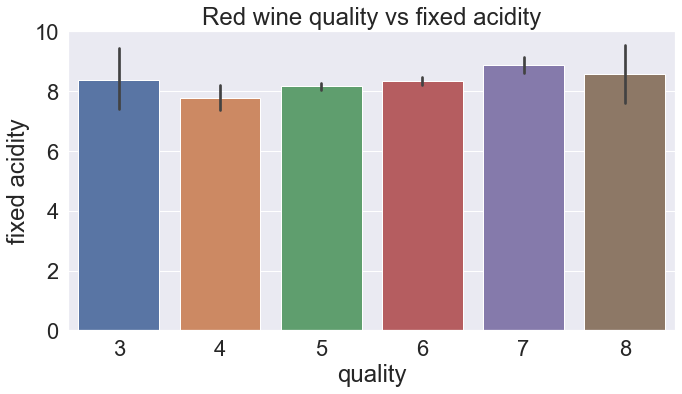

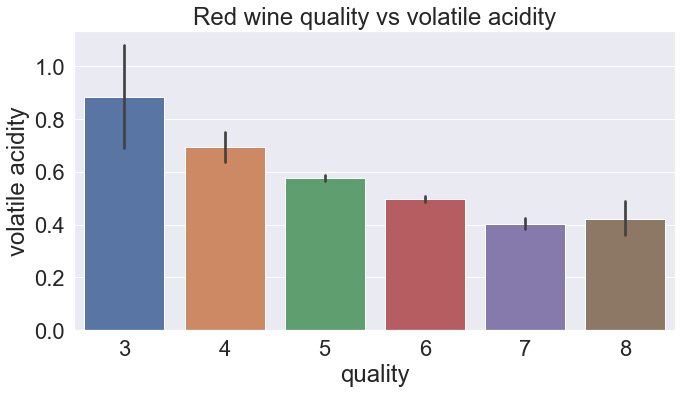

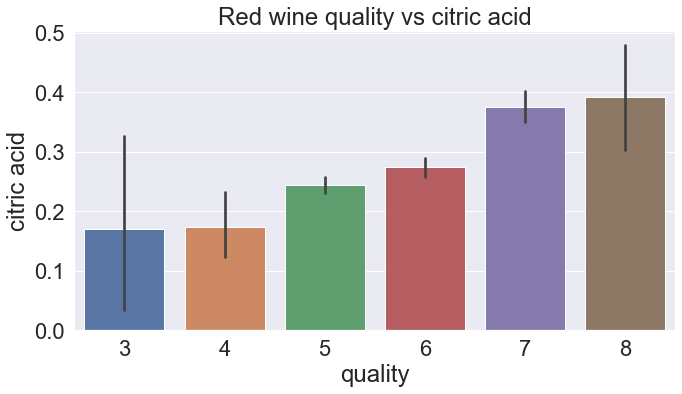

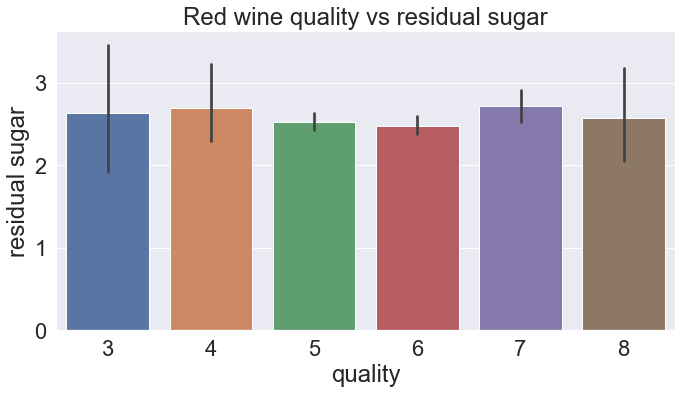

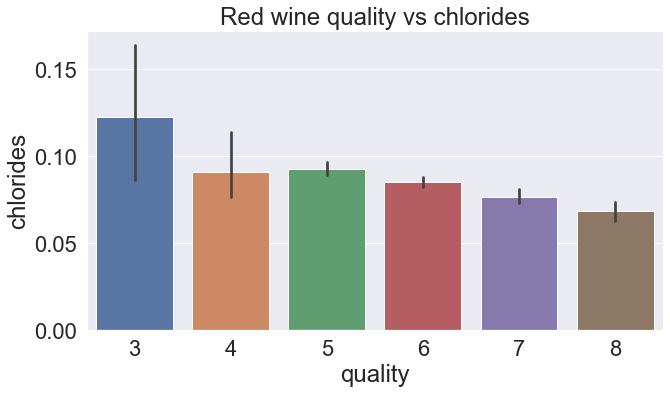

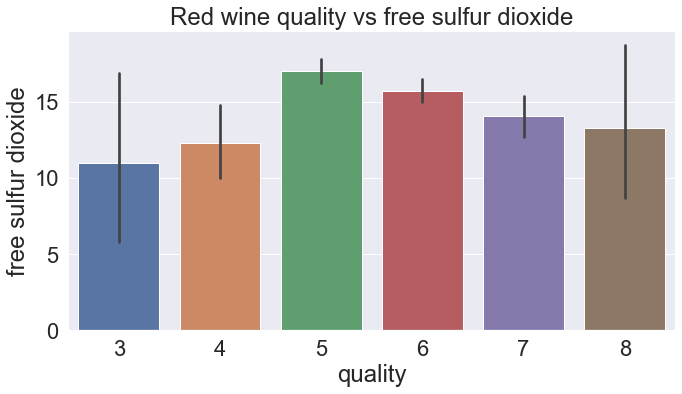

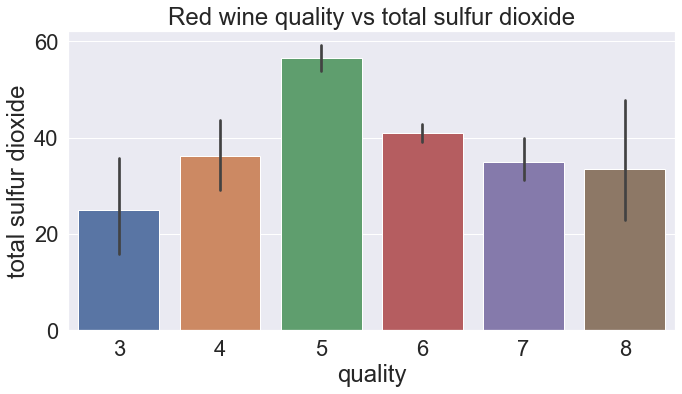

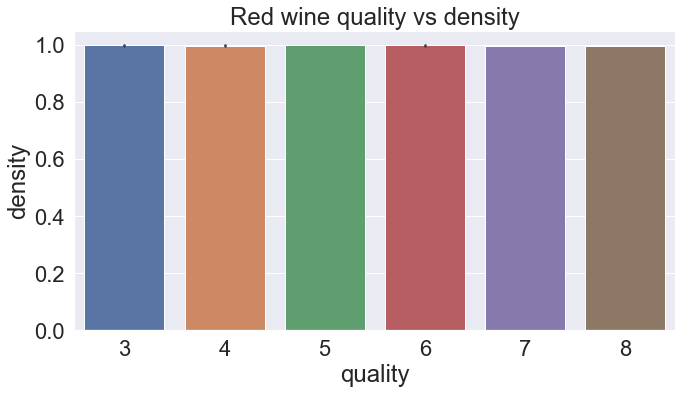

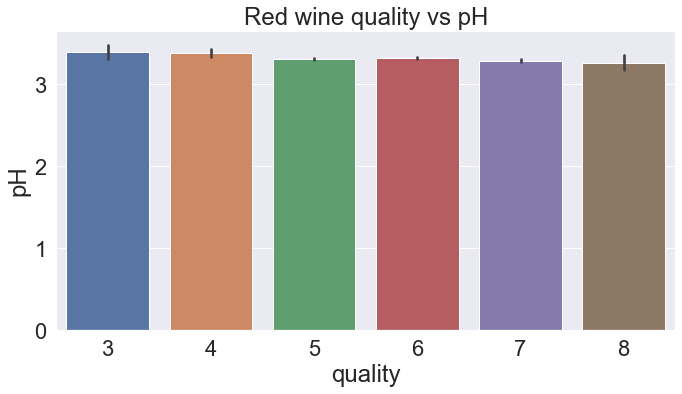

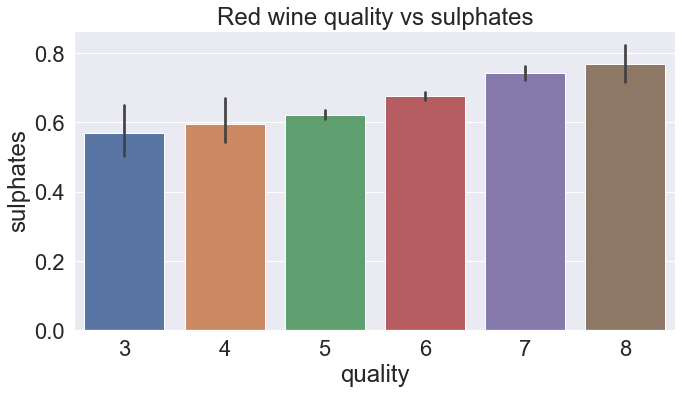

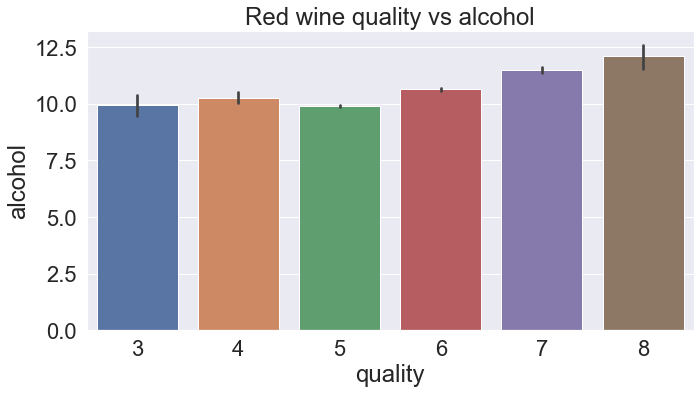

In [11]:
# plot each column vs quality of wine
for rc in red_col:
    plot_eda(rc, raw_red_df, "Red", 'bar')

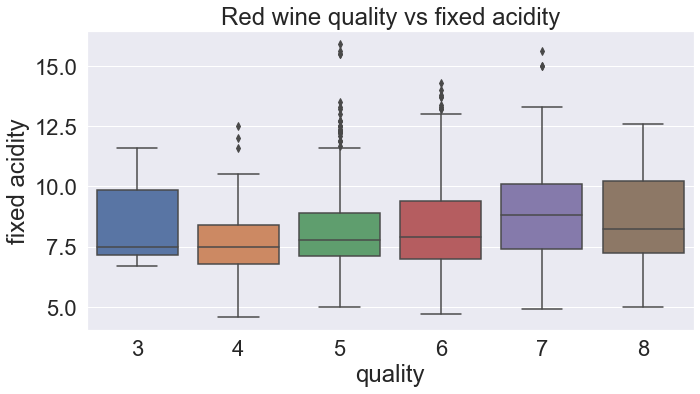

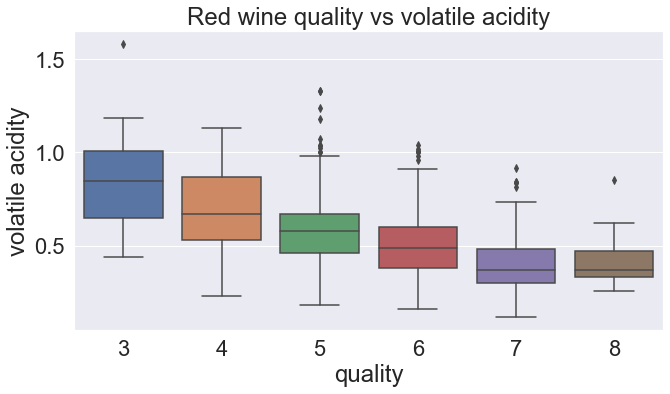

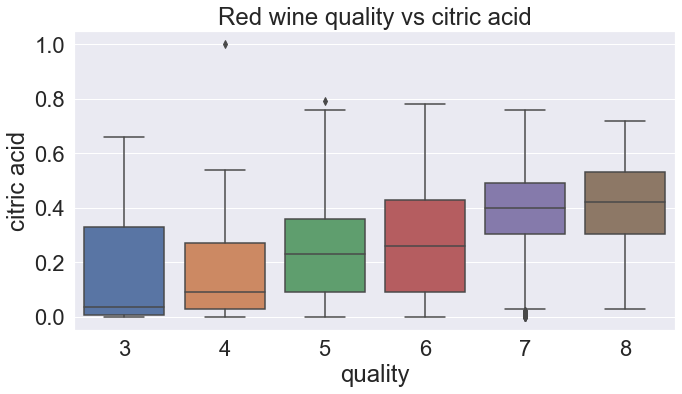

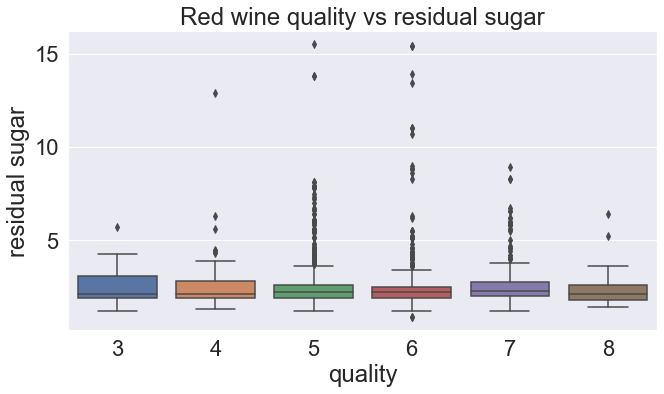

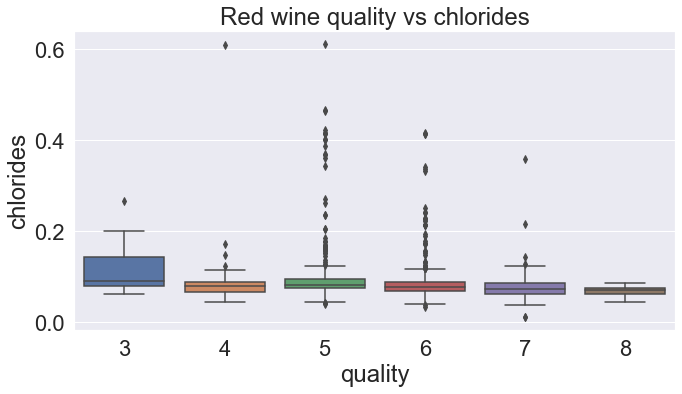

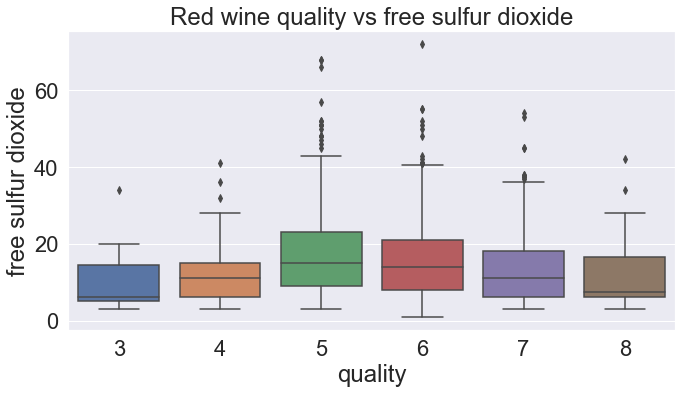

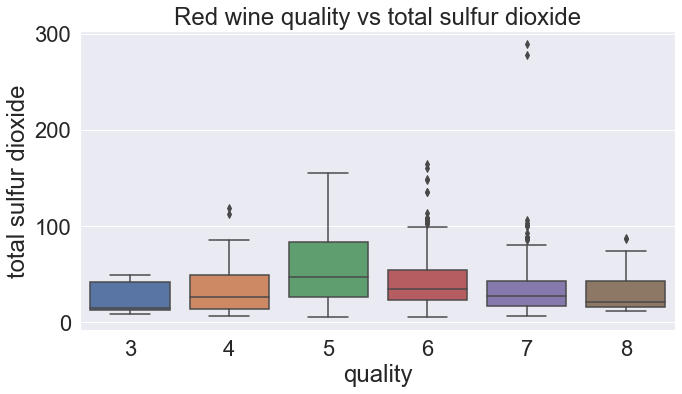

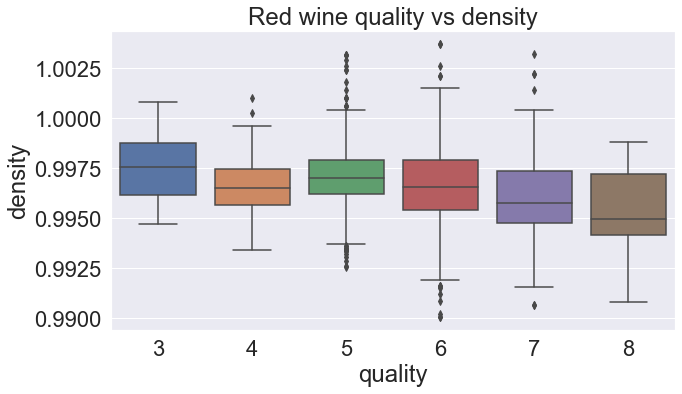

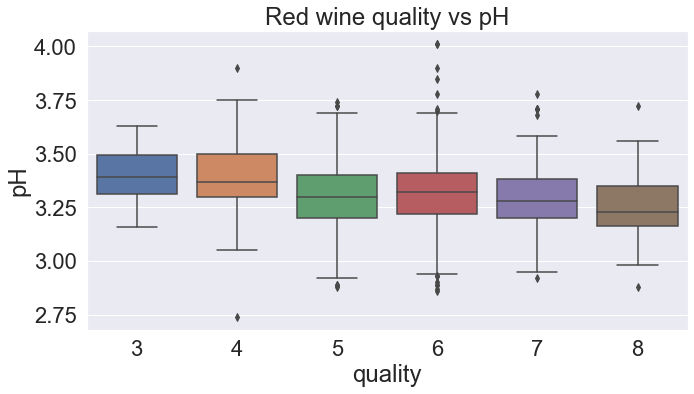

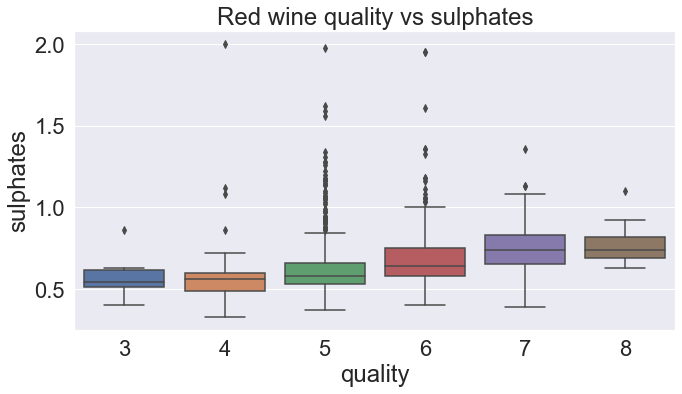

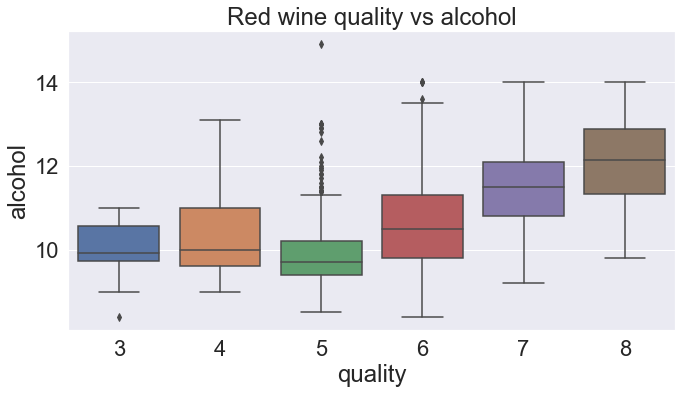

In [12]:
for rc in red_col:
    plot_eda(rc, raw_red_df, "Red", 'box')

### White Wine EDA <a class="anchor" id="White_Wine_EDA"></a>

In [13]:
raw_white_df.shape

(4898, 12)

In [14]:
raw_white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [15]:
raw_white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [16]:
raw_white_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [17]:
white_col = raw_white_df.columns
white_col = white_col.drop('quality')
white_col   

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

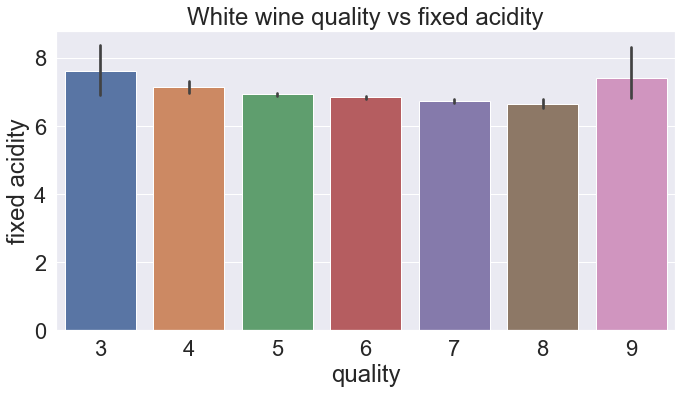

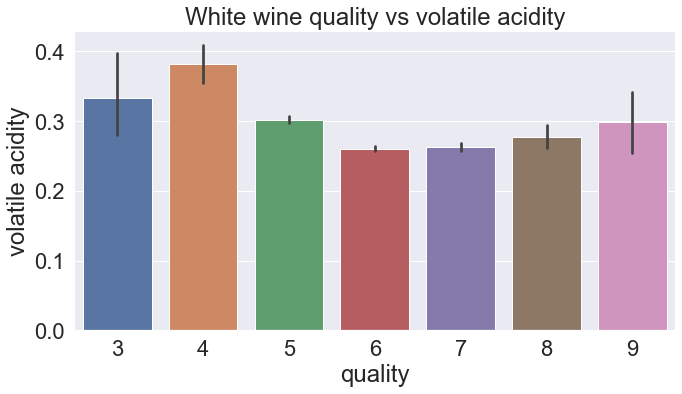

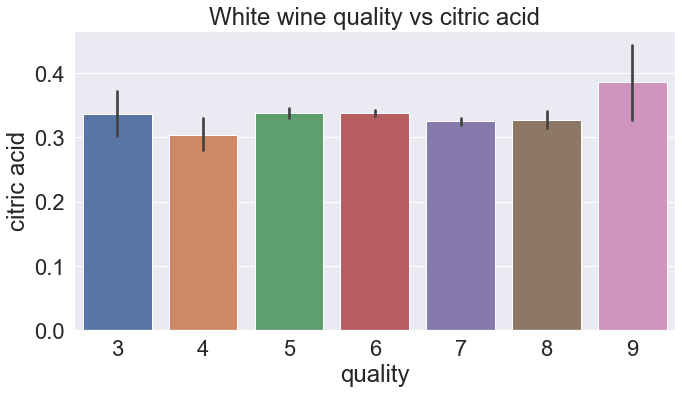

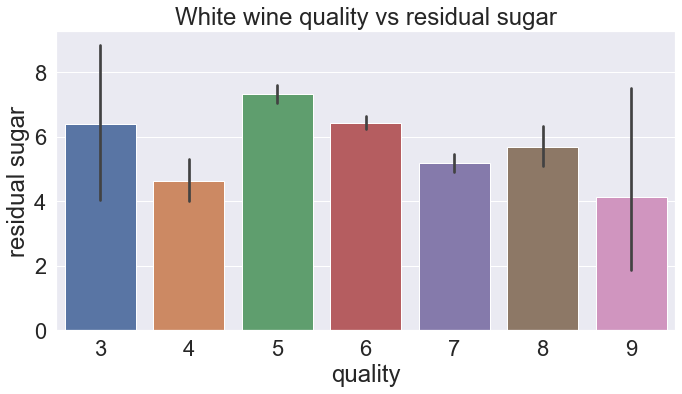

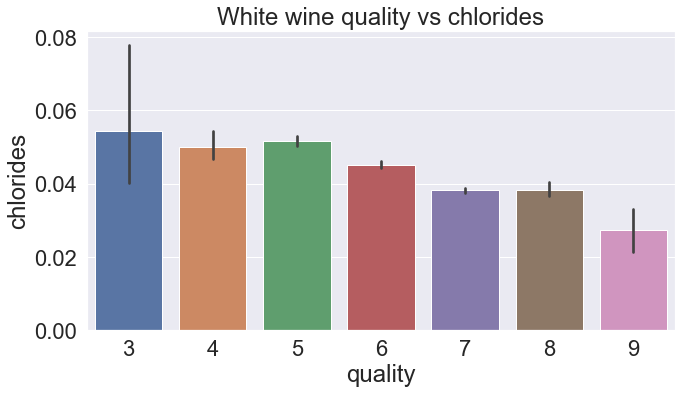

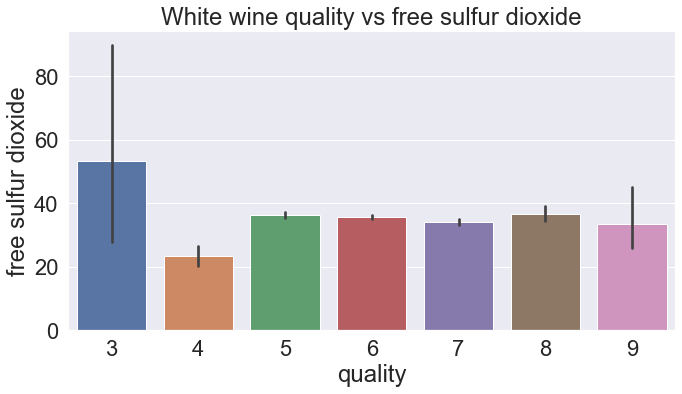

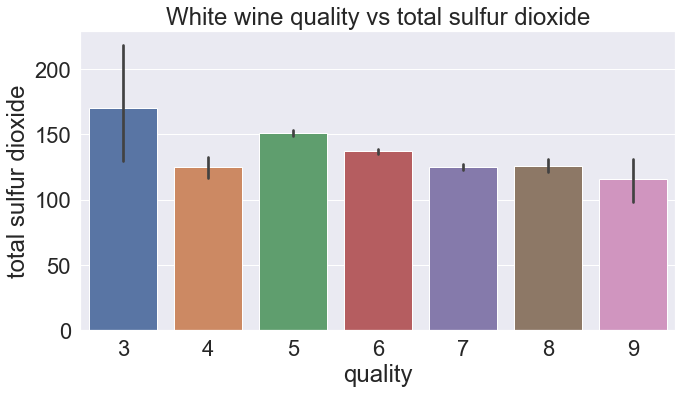

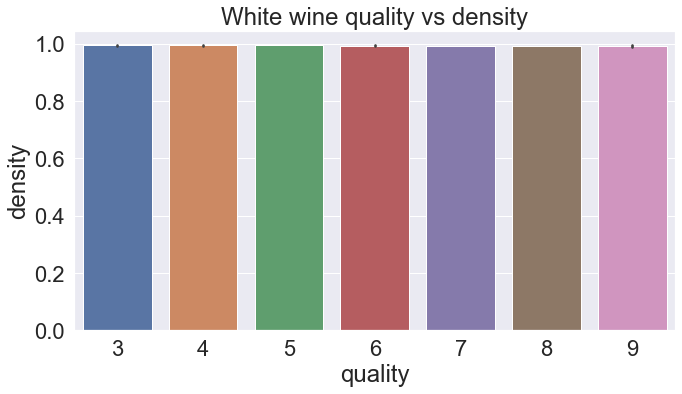

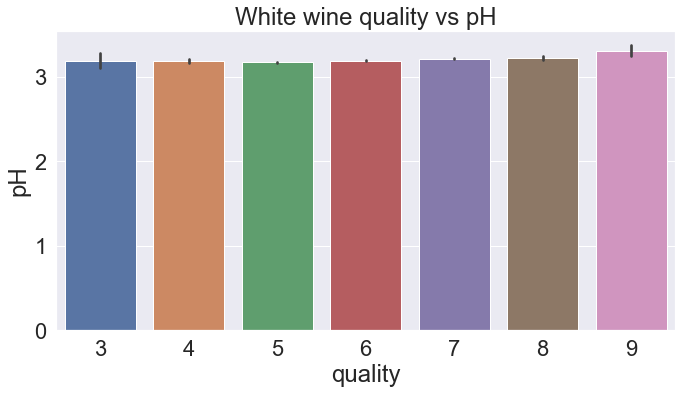

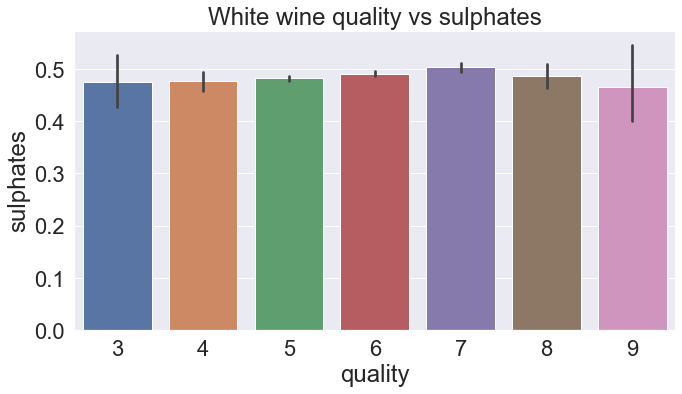

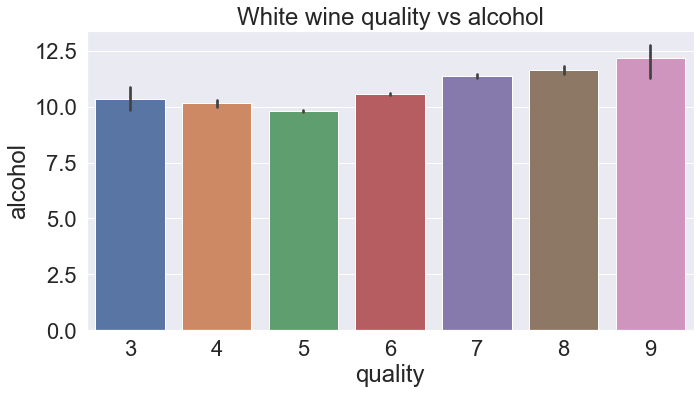

In [18]:
## plot each column vs quality of wine
for wc in white_col:
    plot_eda(wc, raw_white_df, "White", "bar")

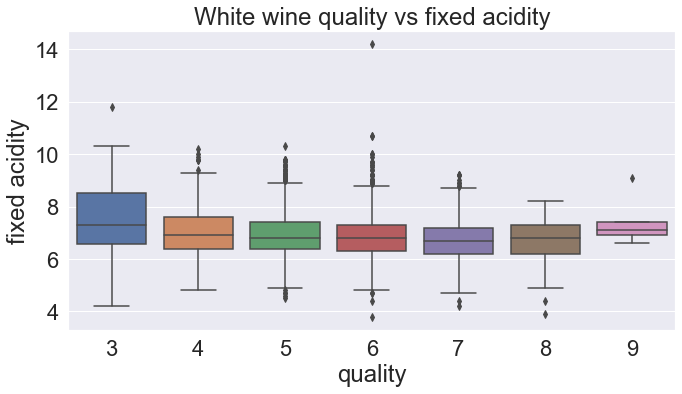

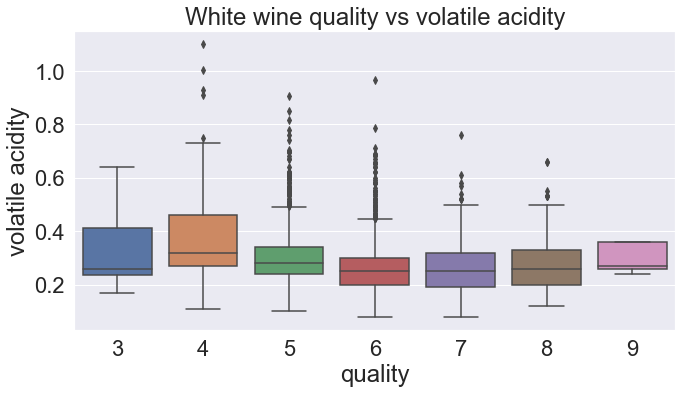

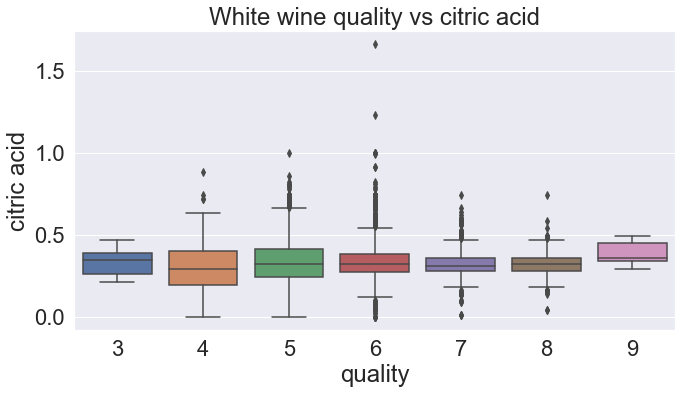

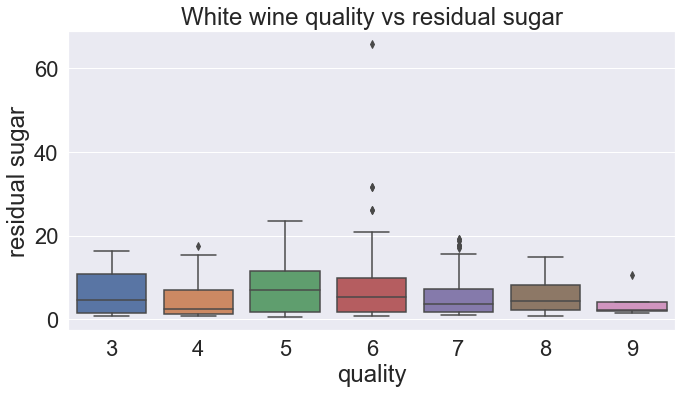

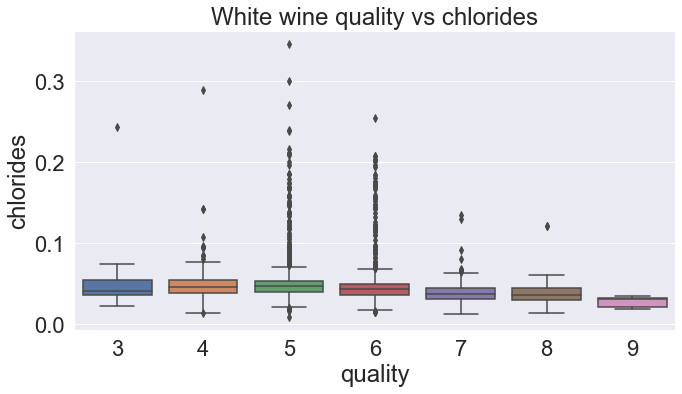

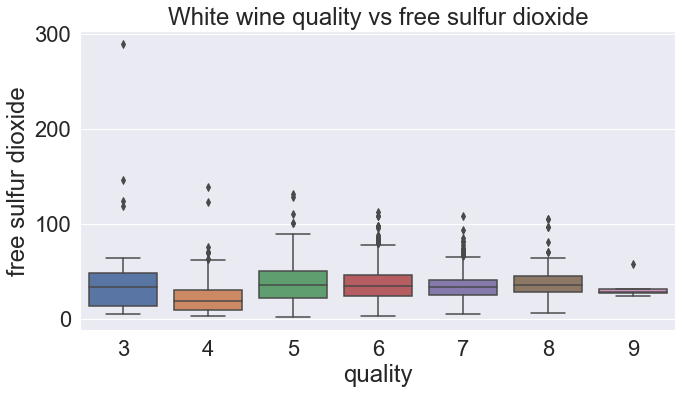

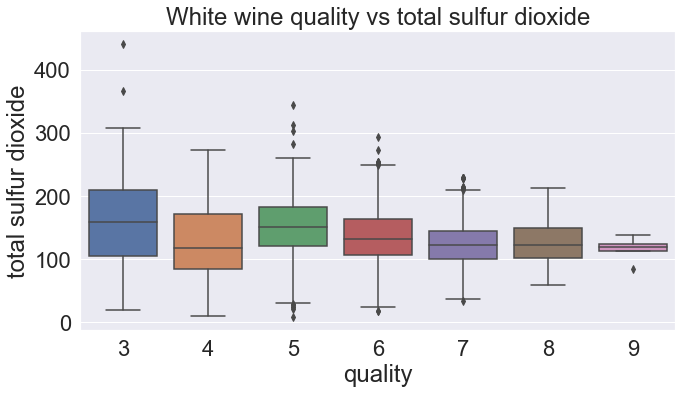

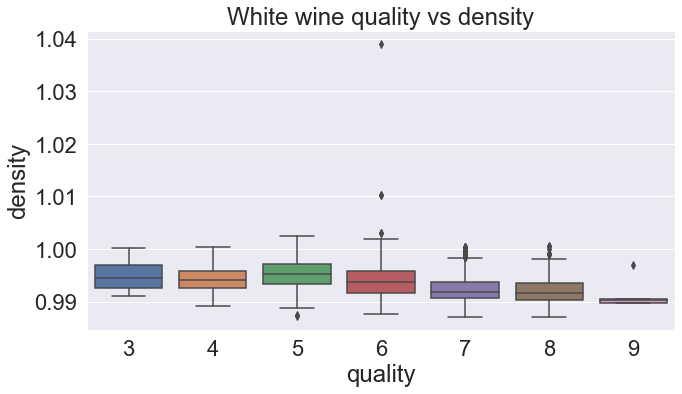

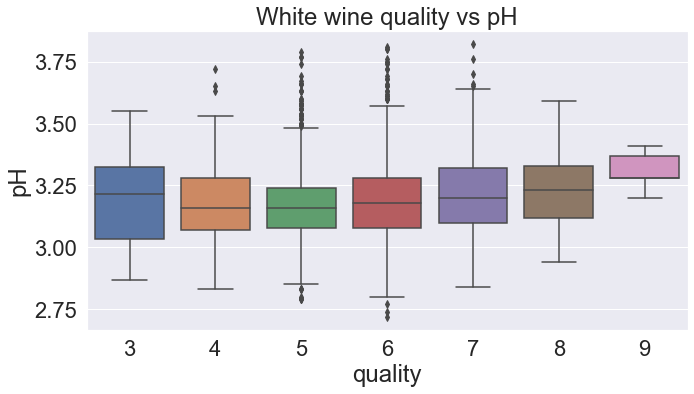

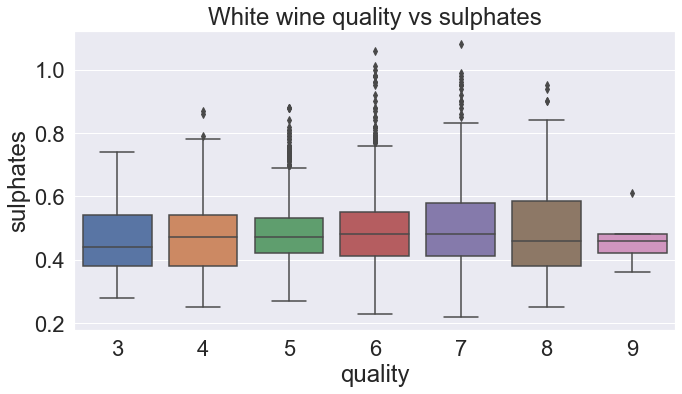

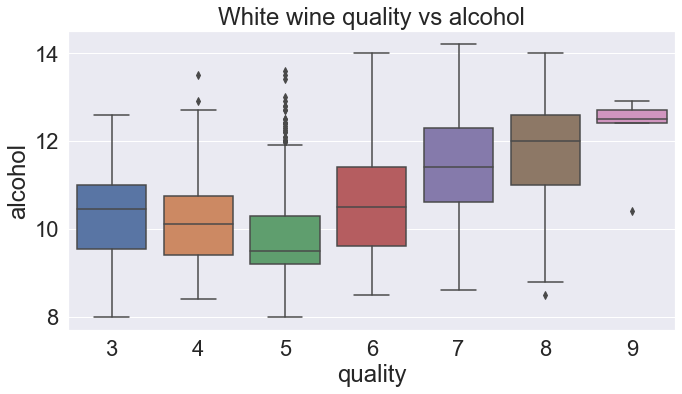

In [19]:
## plot each column vs quality of wine
for wc in white_col:
    plot_eda(wc, raw_white_df, "White", "box")

### Preprocessing Data <a class="anchor" id="Preprocessing_Data"></a>

In [20]:
bins = (1, 6.5, 10)
qual = ['bad', 'good']
label_quality = preprocessing.LabelEncoder()

In [21]:
red_data = raw_red_df
red_data['quality'] = pd.cut(red_data['quality'], bins=bins, labels=qual)
red_data['quality'] = label_quality.fit_transform(red_data['quality'])
red_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [22]:
white_data = raw_white_df
white_data['quality'] = pd.cut(white_data['quality'], bins=bins, labels=qual)
white_data['quality'] = label_quality.fit_transform(white_data['quality'])
white_data['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

### Making count and pi plots for wine quality  <a class="anchor" id="Making_Quality_Plots"></a>

In [23]:
# making count plots
def plot_countplot(data, color):
    sns.countplot(x='quality',data = data, alpha=0.5)
    plt.xlabel(color + ' Wine Quality')
    plt.ylabel('Counts')
    title = color + ' Wine Quality'
    plt.title(title);
    print('{}% of the {} wines are good'.format(round(data.quality.mean(),5)*100, str.lower(color)))
    plt.savefig(p / (title +'_count.pdf') )
    return

#making a pi chart
def plot_piplot(data, color):
    acc_rate = round(data.quality.mean(), 4)*100
    labels = 'Good', 'Bad'
    sizes = [acc_rate, 100-(acc_rate)]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1.1f%%', startangle=0)
    ax1.axis('equal')

    title = "Quality of " + color + " Wine"
    ax1.set_title(title)
    plt.savefig(p / (title+'.pdf') )
    plt.show()
    return

13.571% of the red wines are good


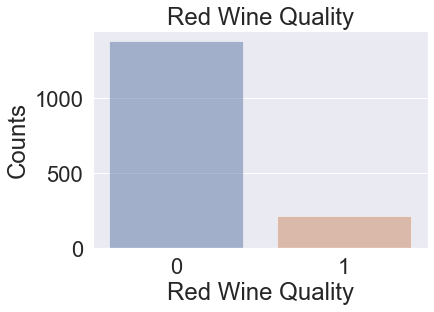

In [24]:
plot_countplot(red_data, "Red")

21.641% of the white wines are good


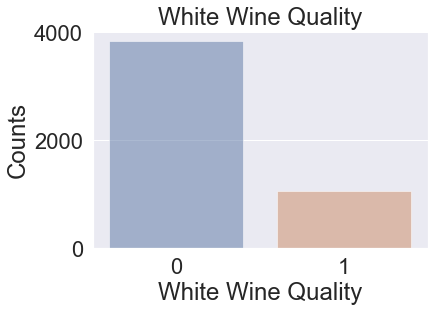

In [25]:
plot_countplot(white_data, 'White')

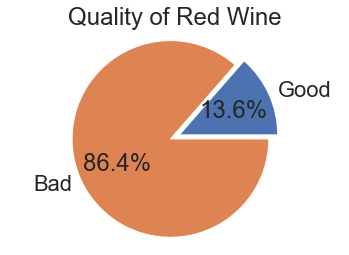

In [26]:
plot_piplot(red_data, "Red")

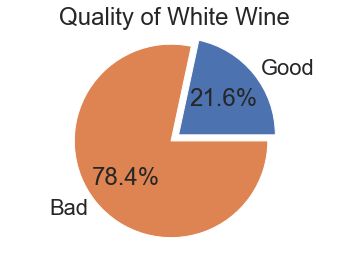

In [27]:
plot_piplot(white_data, 'White')

### Heat maps <a class="anchor" id="Heat_Map"></a>

In [28]:
# Declaring all columns as numerical columns 
num_col = red_data.columns
#cat_col = ['quality']

In [29]:
# original source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

#this function is used for correlation between multi-level categorical features (non-binomial) and numerical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [30]:
# initial source: https://github.com/ithisted/PetAdoptionPrediction/blob/master/PetAdoptionPrediction.ipynb
def plot_heatmap(data, color):
    columns = data.columns
    corr = pd.DataFrame(index=columns, columns=columns)

    for i in range(0, len(columns)):
        for j in range(i, len(columns)):

                if i == j:
                    corr_factor = 1.0

                elif (columns[i] in num_col) and (columns[j] in num_col):
                    corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])

                corr.loc[columns[j],columns[i]] = corr_factor

    corr.fillna(value=np.nan,inplace=True)
    plt.figure(figsize=(20,10))
    sns.set(font_scale=1.8) 
    title = color + ' Wine Heatmap'
    sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 16}).set(title = title)
    plt.tight_layout()
    plt.savefig(p / (color +' wine heatmap.pdf') )
    plt.show()    
    return

#### Red Wine Quality Heat Map <a class="anchor" id="Red_Heat_Map"></a>

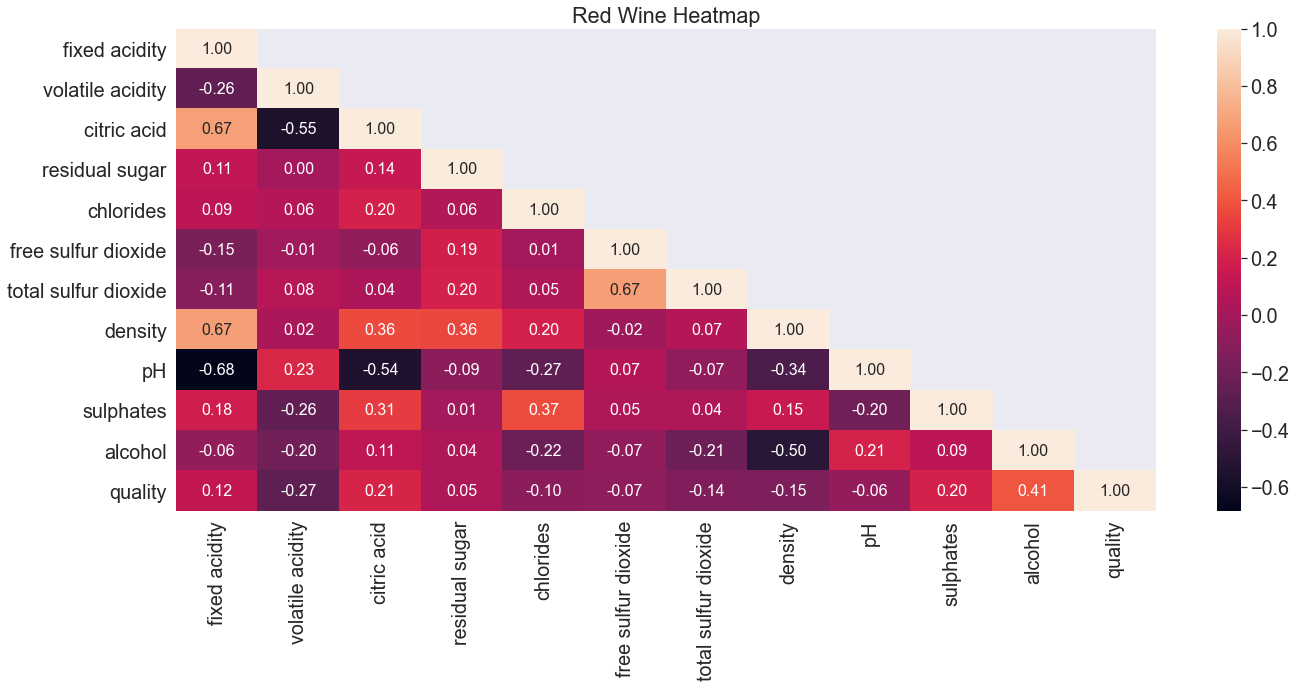

In [31]:
plot_heatmap(red_data, "Red")

#### White Wine Quality Heat Map <a class="anchor" id="White_Heat_Map"></a>

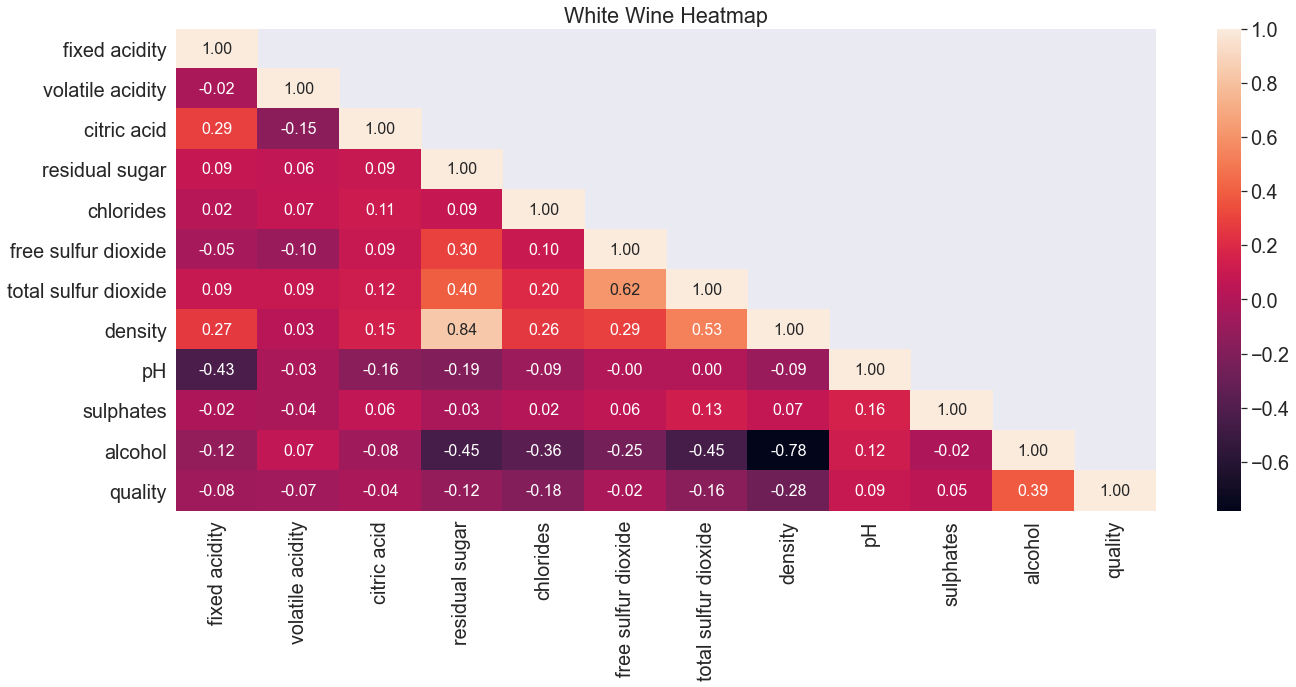

In [32]:
plot_heatmap(white_data, "White")

### Splitting the data into response vs feature variables <a class="anchor" id="Splitting_The_Data"></a>

In [33]:
#adding a random column for a baseline on feature importances

red_data['random'] = np.random.random(size = red_data.shape[0])
white_data['random'] = np.random.random(size = white_data.shape[0])

In [34]:
Xr = red_data.drop('quality', axis=1)
yr = red_data['quality']

Xw = white_data.drop('quality', axis=1)
yw = white_data['quality']

sc = preprocessing.StandardScaler()

In [35]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.25, random_state= 42)

In [36]:
features_to_encode = Xr_train.columns[Xr_train.dtypes==object].tolist()  

In [37]:
Xr_train = sc.fit_transform(Xr_train)
Xr_test = sc.fit_transform(Xr_test)

In [38]:
Xr_train

array([[ 1.97418149, -0.23260309,  1.11458849, ..., -1.3131938 ,
        -1.15257747, -0.75259333],
       [ 0.28189382,  0.37802632,  0.09088663, ..., -0.97064635,
        -1.24703683,  1.1538669 ],
       [-0.71013687,  0.32251456, -1.39348108, ..., -0.62809889,
         1.01998773,  0.59176922],
       ...,
       [-0.65178213,  0.48904985, -1.08637052, ..., -0.68519014,
        -0.8691994 ,  1.37300176],
       [-0.2432989 , -1.84244427,  0.39799719, ...,  0.79918216,
         1.39782516, -0.07551022],
       [-1.46874859, -1.34283839, -0.06266865, ..., -0.68519014,
         2.90917487, -1.288252  ]])

In [39]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.25, random_state= 42)

In [40]:
Xw_train = sc.fit_transform(Xw_train)
Xw_test = sc.fit_transform(Xw_test)

### Feature Importance for Quality of wine data set <a class="anchor" id="Feature_Importance"></a>

#### Feature Importance of Red wine data set <a class="anchor" id="Red_Feature_Importance"></a>

In [41]:
rfc_r = RFC(n_estimators=200)
rfc_r.fit(Xr_train, yr_train)
yr_pred_rfc = rfc_r.predict(Xr_test)

In [42]:
print(classification_report(yr_test, yr_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       347
           1       0.64      0.34      0.44        53

    accuracy                           0.89       400
   macro avg       0.77      0.66      0.69       400
weighted avg       0.87      0.89      0.87       400



In [43]:
print(confusion_matrix(yr_test, yr_pred_rfc))

[[337  10]
 [ 35  18]]


In [44]:
accuracy_score(yr_test, yr_pred_rfc)
print(f"The accuracy of the model is {round(accuracy_score(yr_test,yr_pred_rfc),4)*100} %")

The accuracy of the model is 88.75 %


In [45]:
train_probs = rfc_r.predict_proba(Xr_train)[:,1] 
probs = rfc_r.predict_proba(Xr_test)[:, 1]
train_predictions = rfc_r.predict(Xr_train)

In [46]:
print(f'Train ROC AUC Score: {roc_auc_score(yr_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yr_test, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9152574628894568


In [47]:
def evaluate_model(y_pred, y_test, y_train, probs ,train_predictions, train_probs, title_name):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
        print(f'''{metric.capitalize()}
            Baseline: {round(baseline[metric], 2)}
            Test: {round(results[metric], 2)}
            Train: {round(train_results[metric], 2)}''')
            
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves: '+ title_name);
    plt.tight_layout()
    plt.savefig(p / (title_name +'.pdf') )
    plt.show();
    return

import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.tight_layout()
    plt.savefig(p / (title+'.pdf') )

Recall
            Baseline: 1.0
            Test: 0.34
            Train: 1.0
Precision
            Baseline: 0.13
            Test: 0.64
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 0.92
            Train: 1.0


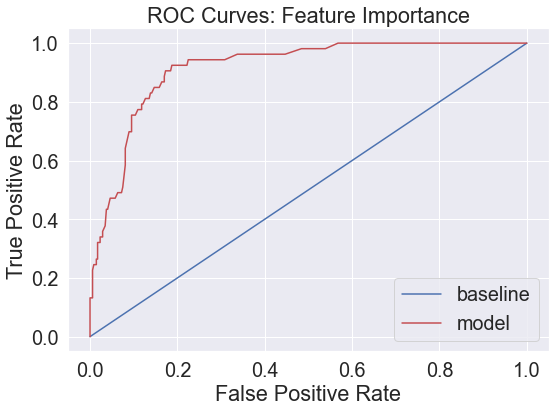

In [48]:
evaluate_model(yr_pred_rfc, yr_test, yr_train, probs, train_predictions, train_probs, title_name="Feature Importance")

In [49]:
confusion_matrix(yr_test, yr_pred_rfc, normalize='all')

array([[0.8425, 0.025 ],
       [0.0875, 0.045 ]])

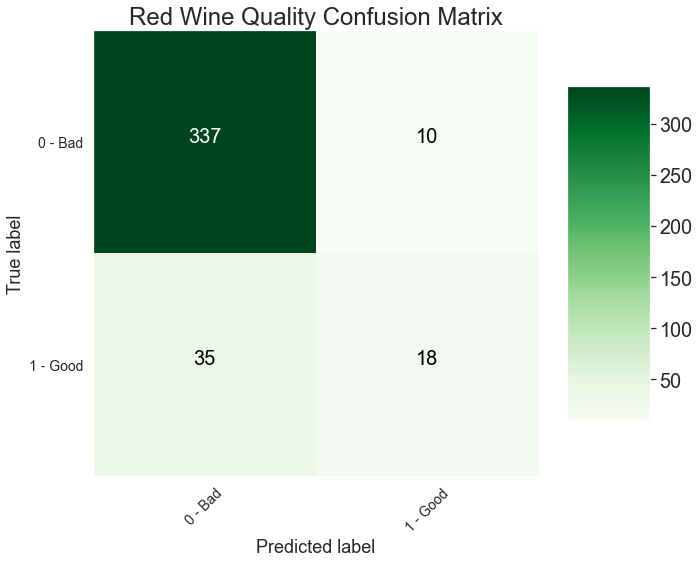

In [50]:
# Let's plot
cm = confusion_matrix(yr_test, yr_pred_rfc)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Red' + ' Wine Quality Confusion Matrix')

#### Random Forest Feature Importance Results for Red Wine vs Quality <a class="anchor" id="Red_Feature_Importance_Result"></a>

In [51]:
print(rfc_r.feature_importances_)
print(f" There are {len(rfc_r.feature_importances_)} features in total")

[0.06131129 0.10153243 0.07947797 0.06098408 0.06739194 0.05624003
 0.07547533 0.08743096 0.05461776 0.10809078 0.17274931 0.07469813]
 There are 12 features in total


In [52]:
rfc_r.feature_importances_

array([0.06131129, 0.10153243, 0.07947797, 0.06098408, 0.06739194,
       0.05624003, 0.07547533, 0.08743096, 0.05461776, 0.10809078,
       0.17274931, 0.07469813])

In [53]:
rcol_names = Xr.columns
feature_importances_r = list(zip(rcol_names, rfc_r.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_r_ranked = sorted(feature_importances_r, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
feature_importances_r

[('fixed acidity', 0.061311285266741386),
 ('volatile acidity', 0.1015324332736946),
 ('citric acid', 0.07947796950119189),
 ('residual sugar', 0.06098408489580262),
 ('chlorides', 0.06739193982826927),
 ('free sulfur dioxide', 0.05624002520925885),
 ('total sulfur dioxide', 0.0754753279828234),
 ('density', 0.08743095541845824),
 ('pH', 0.054617756021840526),
 ('sulphates', 0.10809077671606343),
 ('alcohol', 0.17274931498175916),
 ('random', 0.07469813090409663)]

In [54]:
# Plot the top 12 feature importance
def plot_feature_importance(feature_importances_ranked, color):
    feature_names_ = [i[0] for i in feature_importances_ranked[:20]]
    y_ticks = np.arange(0, len(feature_names_))
    x_axis = [i[1] for i in feature_importances_ranked[:16]]
    plt.figure(figsize = (10, 12))
    plt.barh(feature_names_, x_axis)   #horizontal barplot
    plt.title(color + ' Wine Feature Importance (Random Forest)',
              fontdict= {'fontsize' : 20})
    plt.xlabel('Features',fontdict= {'fontsize' : 16})
    plt.tight_layout()
    plt.savefig(p / (color + ' Random Forest Feature Importance.pdf') )
    plt.show()

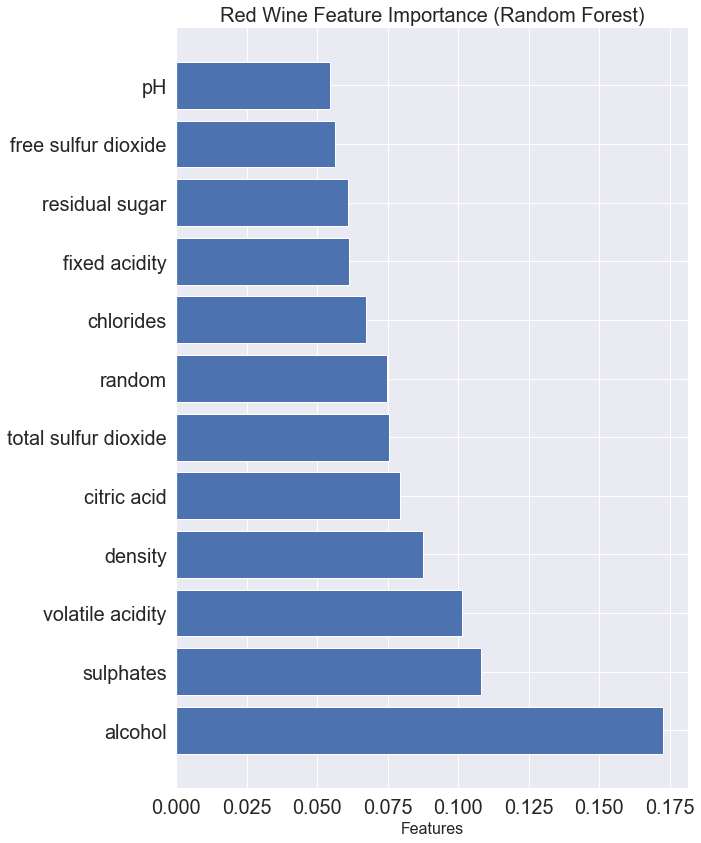

In [55]:
plot_feature_importance(feature_importances_r_ranked, "Red")

#### Feature Importance of White wine data set  <a class="anchor" id="White_Feature_Importance"></a>

In [56]:
rfc_w = RFC(n_estimators=200)
rfc_w.fit(Xw_train, yw_train)
yw_pred_rfc = rfc_w.predict(Xw_test)

In [57]:
print(classification_report(yw_test, yw_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       941
           1       0.84      0.58      0.69       284

    accuracy                           0.88      1225
   macro avg       0.86      0.77      0.80      1225
weighted avg       0.87      0.88      0.87      1225



In [58]:
print(confusion_matrix(yw_test, yw_pred_rfc))

[[909  32]
 [119 165]]


In [59]:
accuracy_score(yw_test, yw_pred_rfc)
print(f"The accuracy of the model is {round(accuracy_score(yw_test,yw_pred_rfc),4)*100} %")

The accuracy of the model is 87.67 %


In [60]:
train_probs = rfc_w.predict_proba(Xw_train)[:,1] 
probs = rfc_w.predict_proba(Xw_test)[:, 1]
train_predictions = rfc_w.predict(Xw_train)

In [61]:
print(f'Train ROC AUC Score: {roc_auc_score(yw_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yw_test, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9148848991932468


Recall
            Baseline: 1.0
            Test: 0.58
            Train: 1.0
Precision
            Baseline: 0.23
            Test: 0.84
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 0.91
            Train: 1.0


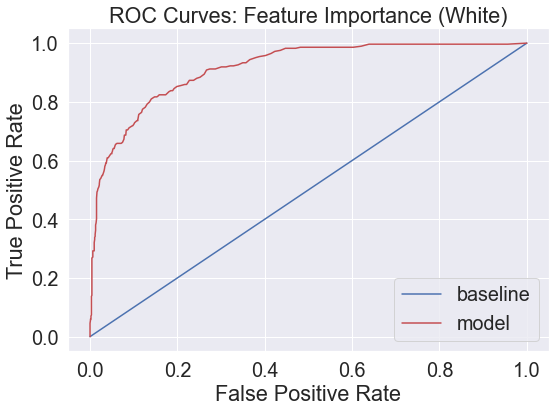

In [62]:
evaluate_model(yw_pred_rfc, yw_test, yw_train, probs, train_predictions, train_probs, title_name="Feature Importance (White)")

In [63]:
confusion_matrix(yw_test, yw_pred_rfc, normalize='all')

array([[0.74204082, 0.02612245],
       [0.09714286, 0.13469388]])

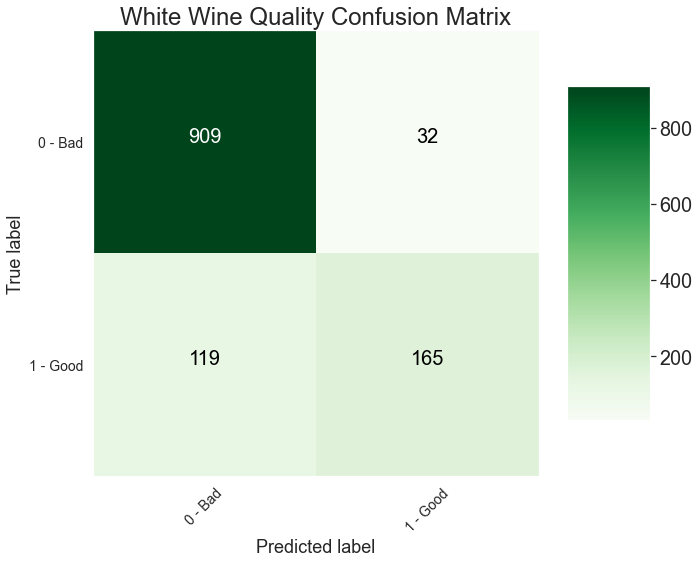

In [64]:
cm = confusion_matrix(yw_test, yw_pred_rfc)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'White' + ' Wine Quality Confusion Matrix')

#### Random Forest Feature Importance Results for White Wine vs Quality <a class="anchor" id="White_Feature_Importance_Result"></a>

In [65]:
print(rfc_w.feature_importances_)
print(f" There are {len(rfc_w.feature_importances_)} features in total")

[0.0630317  0.07766685 0.06486293 0.08223061 0.08153332 0.07478803
 0.07881327 0.12039587 0.08433917 0.07201035 0.1381102  0.06221771]
 There are 12 features in total


In [66]:
wcol_names = Xw.columns
feature_importances_w = list(zip(wcol_names, rfc_w.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_w_ranked = sorted(feature_importances_w, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
#[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];
feature_importances_w

[('fixed acidity', 0.06303169552526225),
 ('volatile acidity', 0.07766684557983312),
 ('citric acid', 0.06486292640405629),
 ('residual sugar', 0.08223060807312313),
 ('chlorides', 0.0815333175407037),
 ('free sulfur dioxide', 0.07478802881408449),
 ('total sulfur dioxide', 0.07881327401434512),
 ('density', 0.1203958680294739),
 ('pH', 0.0843391722661125),
 ('sulphates', 0.07201034746314122),
 ('alcohol', 0.13811020129933466),
 ('random', 0.06221771499052971)]

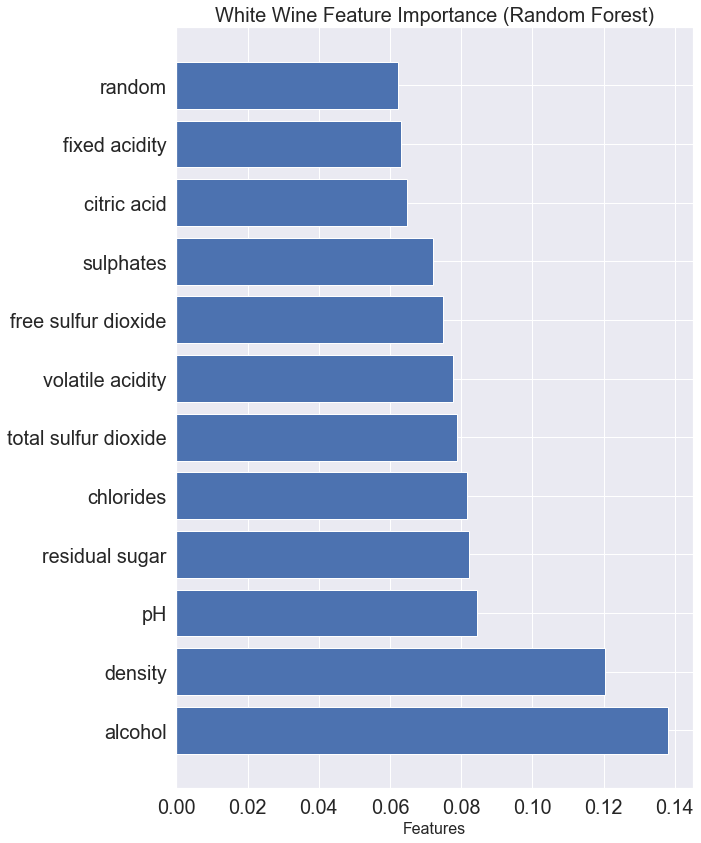

In [67]:
plot_feature_importance(feature_importances_w_ranked, "White")

## Model Selection for Wine Quality <a class="anchor" id="Quality_Model_Selection"></a>

### Model Selection for Quality of Red Wine <a class="anchor" id="Red_Quality_Model_Selection"></a>

#### Random Forest grid search <a class="anchor" id="Red_RFC"></a>

In [68]:
rfc_r = RFC(oob_score=True)
rfc_r.fit(Xr_train, yr_train)
yr_pred_rfc = rfc_r.predict(Xr_test)

In [69]:
# Evaluate Random Forest Model
# Create base model to tune

pprint(rfc_r.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [70]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 3)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True]       # Method of selecting samples for training each tree

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_jobs' : [4], 
               'bootstrap': bootstrap}

In [71]:
# Create random search model and fit the data
rf_grid_r = GridSearchCV(
                        estimator = rfc_r,
                        param_grid = random_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
rf_grid_r.fit(Xr_train, yr_train)
rf_grid_r.best_params_
rf_grid_r.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  7.7min finished


{'bootstrap': True,
 'max_depth': 55,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 275,
 'n_jobs': 4}

In [72]:
# Use the best model after tuning
best_rf_model_r = rf_grid_r.best_estimator_
best_rf_model_r.fit(Xr_train, yr_train)
yr_pred_best_rf_model = best_rf_model_r.predict(Xr_test)
pprint(best_rf_model_r.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 55,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 275,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [73]:
print(classification_report(yr_test, yr_pred_best_rf_model))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       347
           1       0.68      0.40      0.50        53

    accuracy                           0.90       400
   macro avg       0.80      0.68      0.72       400
weighted avg       0.88      0.90      0.88       400



Recall
            Baseline: 1.0
            Test: 0.4
            Train: 1.0
Precision
            Baseline: 0.13
            Test: 0.68
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 0.92
            Train: 1.0


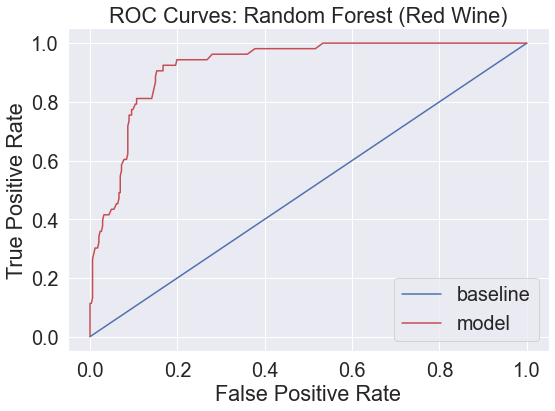

In [74]:
train_rf_predictions_r = best_rf_model_r.predict(Xr_train)
train_rf_probs_r = best_rf_model_r.predict_proba(Xr_train)[:, 1]
rf_probs_r = best_rf_model_r.predict_proba(Xr_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yr_pred_best_rf_model, yr_test, yr_train,rf_probs_r, train_rf_predictions_r, train_rf_probs_r, title_name="Random Forest (Red Wine)")

In [75]:
print(f'Train ROC AUC Score: {roc_auc_score(yr_train, train_rf_probs_r)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yr_test, rf_probs_r)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9219727040400196


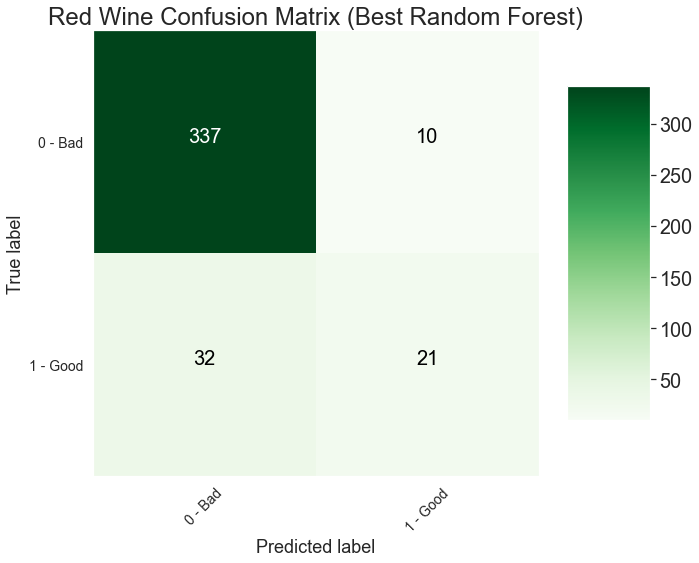

In [76]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yr_test, yr_pred_best_rf_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'Red Wine Confusion Matrix (Best Random Forest)')

#### Stochastic Gradient Decent grid search <a class="anchor" id="Red_SGDC"></a>

In [77]:
sgd_r = SGDC()
sgd_r.fit(Xr_train, yr_train)
yr_pred_sgd = sgd_r.predict(Xr_test)

In [78]:
# Evaluate Random Forest Model
# Create base model to tune

pprint(sgd_r.get_params())

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [79]:
loss = ['hinge', 'log']
alpha = list(np.logspace(-5, -1, 5).astype(float))
epsilon = list(np.linspace(0.001, 0.5, 6).astype(float))
max_iter = list(np.logspace(3, 6, 4).astype(float))
l1_ratio = list(np.linspace(0.1, 0.5, 5).astype(float))

sgd_grid = {'loss': loss,
             'alpha': alpha,
             'epsilon': epsilon,
             'l1_ratio': l1_ratio,
             'max_iter': max_iter,
             'random_state': [42],
             'n_jobs' : [4]
           }

In [80]:
# Create random search model and fit the data
sgd_grid_r = GridSearchCV(
                        estimator = sgd_r,
                        param_grid = sgd_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
sgd_grid_r.fit(Xr_train, yr_train)
sgd_grid_r.best_params_
sgd_grid_r.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:   25.6s finished


{'alpha': 0.1,
 'epsilon': 0.001,
 'l1_ratio': 0.1,
 'loss': 'log',
 'max_iter': 1000.0,
 'n_jobs': 4,
 'random_state': 42}

In [81]:
# Use the best model after tuning
best_sgd_model_r = sgd_grid_r.best_estimator_
best_sgd_model_r.fit(Xr_train, yr_train)
yr_pred_best_sgd_model = best_sgd_model_r.predict(Xr_test)
pprint(best_sgd_model_r.get_params())

{'alpha': 0.1,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.001,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 1000.0,
 'n_iter_no_change': 5,
 'n_jobs': 4,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [82]:
print(classification_report(yr_test, yr_pred_best_sgd_model))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       347
           1       0.50      0.02      0.04        53

    accuracy                           0.87       400
   macro avg       0.68      0.51      0.48       400
weighted avg       0.82      0.87      0.81       400



In [83]:
print(confusion_matrix(yr_test, yr_pred_best_sgd_model))

[[346   1]
 [ 52   1]]


Recall
            Baseline: 1.0
            Test: 0.02
            Train: 0.05
Precision
            Baseline: 0.13
            Test: 0.5
            Train: 0.57
Roc
            Baseline: 0.5
            Test: 0.89
            Train: 0.87


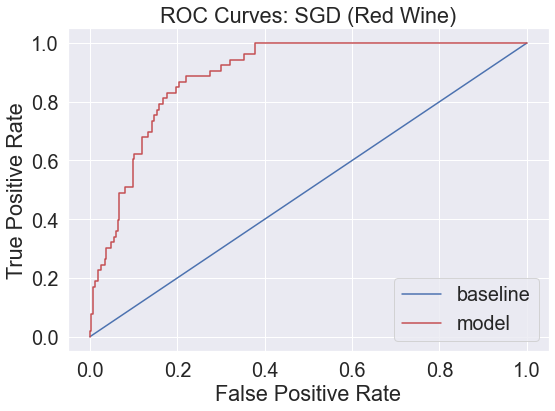

In [84]:
train_sgd_predictions_r = best_sgd_model_r.predict(Xr_train)
train_sgd_probs_r = best_sgd_model_r.predict_proba(Xr_train)[:, 1]
sgd_probs_r = best_sgd_model_r.predict_proba(Xr_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yr_pred_best_sgd_model, yr_test, yr_train, sgd_probs_r, train_sgd_predictions_r, train_sgd_probs_r,title_name="SGD (Red Wine)")

In [85]:
print(f'Train ROC AUC Score: {roc_auc_score(yr_train, train_sgd_probs_r)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yr_test, sgd_probs_r)}')

Train ROC AUC Score: 0.8741310239189349
Test ROC AUC  Score: 0.8923930183241803


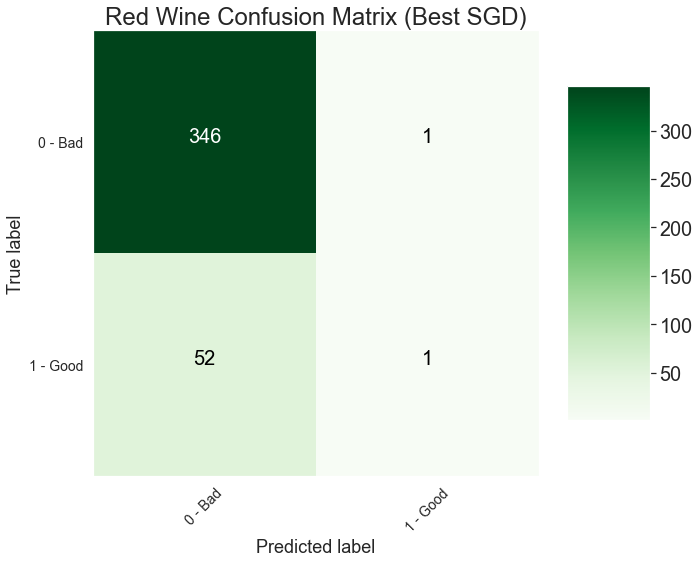

In [86]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yr_test, yr_pred_best_sgd_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'Red Wine Confusion Matrix (Best SGD)')

#### Support Vector Classifier grid search  <a class="anchor" id="Red_SVC"></a>

In [87]:
svc_r = SVC()
svc_r.fit(Xr_train, yr_train)
yr_pred_svc = svc_r.predict(Xr_test)

In [88]:
# Evaluate Random Forest Model
# Create base model to tune

pprint(svc_r.get_params())

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [89]:
C = list(np.logspace(-2, 1, 15).astype(float))
gamma = ['scale', 'auto']
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
probability = [True, False]
svc_grid = {'C': C,
             'gamma': gamma,
             'kernel': kernel,
             'probability': probability
           }

In [90]:
# Create random search model and fit the data
svc_grid_r = GridSearchCV(
                        estimator = svc_r,
                        param_grid = svc_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
svc_grid_r.fit(Xr_train, yr_train)
svc_grid_r.best_params_
svc_grid_r.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   35.7s finished


{'C': 3.727593720314938,
 'gamma': 'scale',
 'kernel': 'linear',
 'probability': True}

In [91]:
# Use the best model after tuning
best_svc_model_r = svc_grid_r.best_estimator_
best_svc_model_r.fit(Xr_train, yr_train)
yr_pred_best_svc_model = best_svc_model_r.predict(Xr_test)
pprint(best_svc_model_r.get_params())

{'C': 3.727593720314938,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [92]:
print(classification_report(yr_test, yr_pred_best_svc_model))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       347
           1       0.00      0.00      0.00        53

    accuracy                           0.87       400
   macro avg       0.43      0.50      0.46       400
weighted avg       0.75      0.87      0.81       400



C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
print(confusion_matrix(yr_test, yr_pred_best_svc_model))

[[347   0]
 [ 53   0]]


Recall
            Baseline: 1.0
            Test: 0.0
            Train: 0.0
Precision
            Baseline: 0.13
            Test: 0.0
            Train: 0.0
Roc
            Baseline: 0.5
            Test: 0.85
            Train: 0.86


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


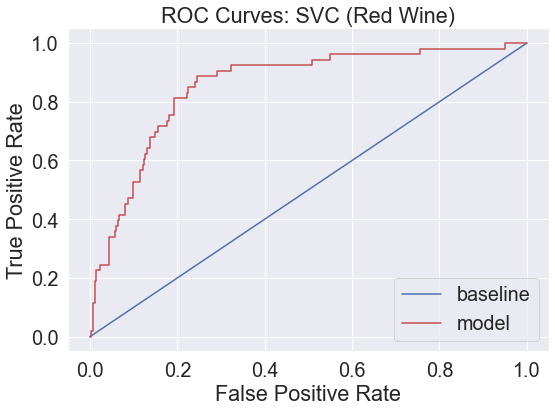

In [94]:
train_svc_predictions_r = best_svc_model_r.predict(Xr_train)
train_svc_probs_r = best_svc_model_r.predict_proba(Xr_train)[:, 1]
svc_probs_r = best_svc_model_r.predict_proba(Xr_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yr_pred_best_svc_model, yr_test, yr_train, svc_probs_r, train_svc_predictions_r, train_svc_probs_r, title_name="SVC (Red Wine)")

In [95]:
print(f'Train ROC AUC Score: {roc_auc_score(yr_train, train_svc_probs_r)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yr_test, svc_probs_r)}')

Train ROC AUC Score: 0.8591375044185224
Test ROC AUC  Score: 0.8548202925343917


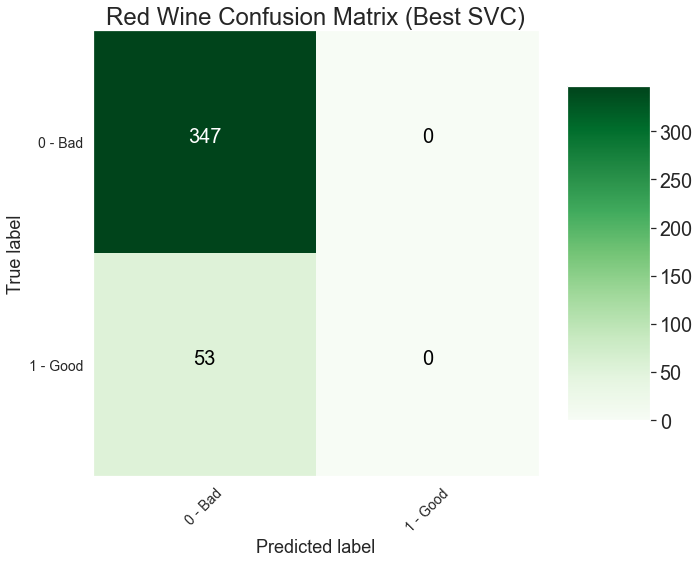

In [96]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yr_test, yr_pred_best_svc_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'Red Wine Confusion Matrix (Best SVC)')

### Model Selection for Quality of White Wine <a class="anchor" id="White_Quality_Model_Selection"></a>

#### Random Forest grid search  <a class="anchor" id="White_RFC"></a>

In [97]:
rfc_w = RFC(oob_score=True)
rfc_w.fit(Xw_train, yw_train)
yw_pred_rfc = rfc_w.predict(Xw_test)

In [98]:
# Create random search model and fit the data
rf_grid_w = GridSearchCV(
                        estimator = rfc_w,
                        param_grid = random_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
rf_grid_w.fit(Xw_train, yw_train)
rf_grid_w.best_params_
rf_grid_w.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 12.2min finished


{'bootstrap': True,
 'max_depth': 55,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500,
 'n_jobs': 4}

In [99]:
# Use the best model after tuning
best_rf_model_w = rf_grid_w.best_estimator_
best_rf_model_w.fit(Xw_train, yw_train)
yw_pred_best_rf_model = best_rf_model_w.predict(Xw_test)
pprint(best_rf_model_w.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 55,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Recall
            Baseline: 1.0
            Test: 0.57
            Train: 1.0
Precision
            Baseline: 0.23
            Test: 0.84
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 0.92
            Train: 1.0


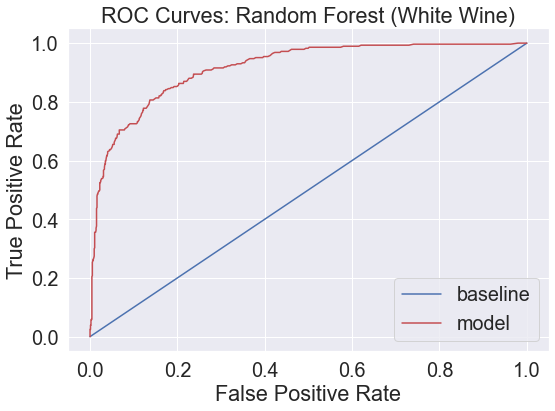

In [100]:
train_rf_predictions_w = best_rf_model_w.predict(Xw_train)
train_rf_probs_w = best_rf_model_w.predict_proba(Xw_train)[:, 1]
rf_probs_w = best_rf_model_w.predict_proba(Xw_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yw_pred_best_rf_model, yw_test, yw_train, rf_probs_w, train_rf_predictions_w, train_rf_probs_w, title_name="Random Forest (White Wine)")

In [101]:
print(f'Train ROC AUC Score: {roc_auc_score(yw_train, train_rf_probs_w)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yw_test, rf_probs_w)}')

Train ROC AUC Score: 0.9999999999999999
Test ROC AUC  Score: 0.9155247638861863


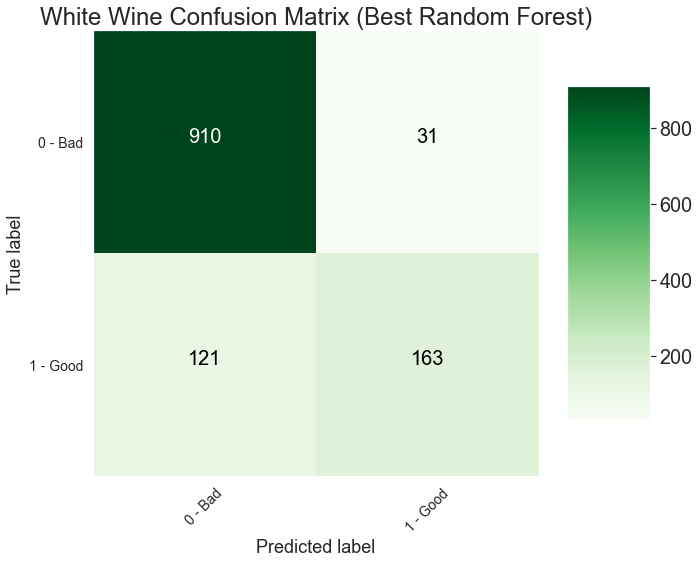

In [102]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yw_test, yw_pred_best_rf_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'White Wine Confusion Matrix (Best Random Forest)')

#### Stochastic Gradient Decent grid search  <a class="anchor" id="White_SGDC"></a>

In [103]:
sgd_w = SGDC()
sgd_w.fit(Xw_train, yw_train)
yw_pred_sgd = sgd_w.predict(Xw_test)

In [104]:
# Create random search model and fit the data
sgd_grid_w = GridSearchCV(
                        estimator = sgd_w,
                        param_grid = sgd_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
sgd_grid_w.fit(Xw_train, yw_train)
sgd_grid_w.best_params_
sgd_grid_w.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:  1.2min finished


{'alpha': 0.001,
 'epsilon': 0.001,
 'l1_ratio': 0.1,
 'loss': 'log',
 'max_iter': 1000.0,
 'n_jobs': 4,
 'random_state': 42}

In [105]:
# Use the best model after tuning
best_sgd_model_w = sgd_grid_w.best_estimator_
best_sgd_model_w.fit(Xw_train, yw_train)
yw_pred_best_sgd_model = best_sgd_model_w.predict(Xw_test)
pprint(best_sgd_model_w.get_params())

{'alpha': 0.001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.001,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 1000.0,
 'n_iter_no_change': 5,
 'n_jobs': 4,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [106]:
print(classification_report(yw_test, yw_pred_best_sgd_model))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       941
           1       0.59      0.37      0.45       284

    accuracy                           0.79      1225
   macro avg       0.71      0.64      0.66      1225
weighted avg       0.77      0.79      0.78      1225



In [107]:
print(confusion_matrix(yw_test, yw_pred_best_sgd_model))

[[869  72]
 [180 104]]


Recall
            Baseline: 1.0
            Test: 0.37
            Train: 0.35
Precision
            Baseline: 0.23
            Test: 0.59
            Train: 0.55
Roc
            Baseline: 0.5
            Test: 0.78
            Train: 0.79


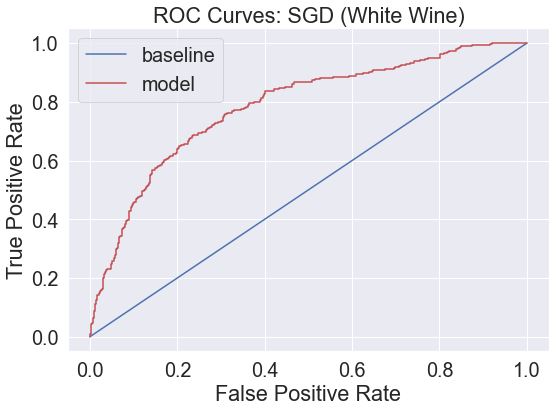

In [108]:
train_sgd_predictions_w = best_sgd_model_w.predict(Xw_train)
train_sgd_probs_w = best_sgd_model_w.predict_proba(Xw_train)[:, 1]
sgd_probs_w = best_sgd_model_w.predict_proba(Xw_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yw_pred_best_sgd_model, yw_test, yw_train, sgd_probs_w, train_sgd_predictions_w, train_sgd_probs_w, title_name="SGD (White Wine)")

In [109]:
print(f'Train ROC AUC Score: {roc_auc_score(yw_train, train_sgd_probs_w)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yw_test, sgd_probs_w)}')

Train ROC AUC Score: 0.7913629990498525
Test ROC AUC  Score: 0.7835012198590051


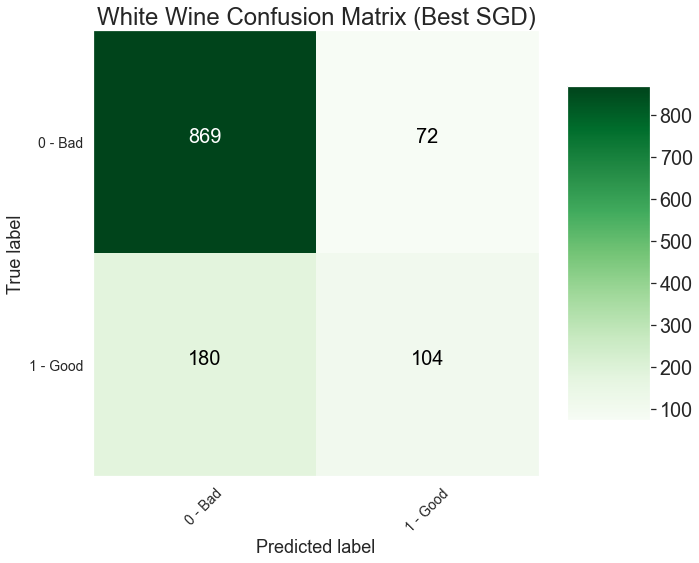

In [110]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yw_test, yw_pred_best_sgd_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'White Wine Confusion Matrix (Best SGD)')

#### Support Vector Classifier grid search  <a class="anchor" id="White_SVC"></a>

In [111]:
svc_w = SVC()
svc_w.fit(Xw_train, yw_train)
yw_pred_svc = svc_w.predict(Xw_test)

In [112]:
# Create random search model and fit the data
svc_grid_w = GridSearchCV(
                        estimator = svc_w,
                        param_grid = svc_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
svc_grid_w.fit(Xw_train, yw_train)
svc_grid_w.best_params_
svc_grid_w.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  8.2min finished


{'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}

In [113]:
# Use the best model after tuning
best_svc_model_w = svc_grid_w.best_estimator_
best_svc_model_w.fit(Xw_train, yw_train)
yw_pred_best_svc_model = best_svc_model_w.predict(Xw_test)
pprint(best_svc_model_w.get_params())

{'C': 10.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [114]:
print(classification_report(yw_test, yw_pred_best_svc_model))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       941
           1       0.73      0.49      0.59       284

    accuracy                           0.84      1225
   macro avg       0.79      0.72      0.74      1225
weighted avg       0.83      0.84      0.83      1225



In [115]:
print(confusion_matrix(yw_test, yw_pred_best_svc_model))

[[889  52]
 [144 140]]


Recall
            Baseline: 1.0
            Test: 0.49
            Train: 0.59
Precision
            Baseline: 0.23
            Test: 0.73
            Train: 0.86
Roc
            Baseline: 0.5
            Test: 0.86
            Train: 0.94


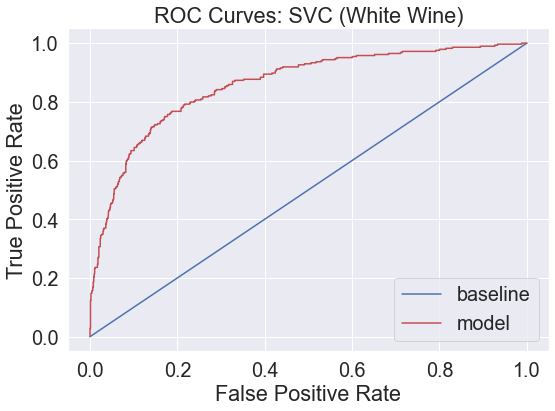

In [116]:
train_svc_predictions_w = best_svc_model_w.predict(Xw_train)
train_svc_probs_w = best_svc_model_w.predict_proba(Xw_train)[:, 1]
svc_probs_w = best_svc_model_w.predict_proba(Xw_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yw_pred_best_svc_model, yw_test, yw_train, svc_probs_w, train_svc_predictions_w, train_svc_probs_w, title_name="SVC (White Wine)")

In [117]:
print(f'Train ROC AUC Score: {roc_auc_score(yw_train, train_svc_probs_w)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yw_test, svc_probs_w)}')

Train ROC AUC Score: 0.942744271535787
Test ROC AUC  Score: 0.8590464145125802


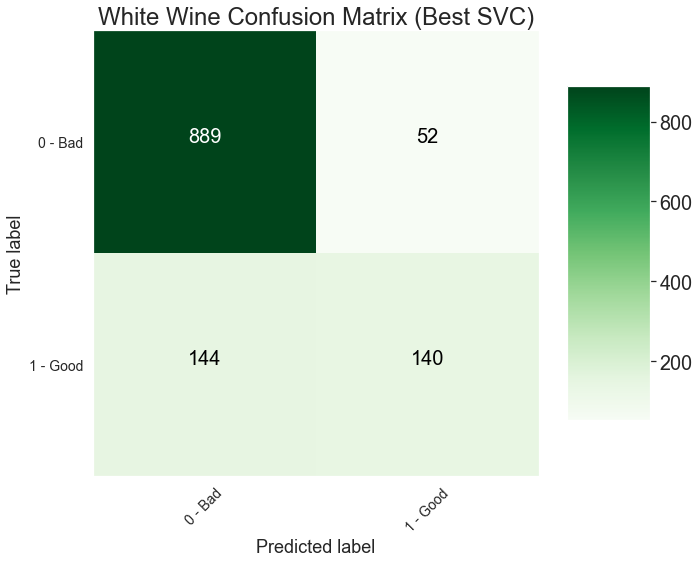

In [118]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yw_test, yw_pred_best_svc_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'White Wine Confusion Matrix (Best SVC)')

## Wine Quality Conclusions  <a class="anchor" id="Quality_Conclusions"></a>

The quality of both red and white wine was determined with relatively high accuracy in both cases, about 92%. Interestingly, the physicochemical features to determine what makes a good red wine are different from what makes a good white wine. This result may not be surprising to a good sommelier. The consistency of what makes a good quality red or white wine was observed from the physicochemical characteristics and should outline good quality control goals for the wine making process. 

The data set could be bolstered by adding more red wines to make the two data sets more even. Additionally, the distribution of the score values were distributed in such a way that few of the lowest and highest quality wines were recorded. Additional entries of these extreme cases could bolster the evidence of what makes a truly good or bad wine of each type. 

# Red vs White Wine Color Classifer  <a id='Wine_Color_Header'></a>

## Form the Wine Color Data Set from both Red and White wine Quality Data sets <a class="anchor" id="Form_Color_Data"></a>

In [119]:
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.569879
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0.908304
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0.234200
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0.912375
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.696423


In [120]:
red_data['color'] = "red"
red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.569879,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.908304,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.234200,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,0.912375,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.696423,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,0.756452,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,0.647752,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,0.139489,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,0.452463,red


In [121]:
white_data['color'] = "white"
white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0,0.716462,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,0.395241,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,0.877402,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,0.266065,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,0.792925,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0.889512,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0.322425,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0.499535,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0.182231,white


In [122]:
wine_df = pd.concat([red_data, white_data], ignore_index=True)
wine_df.shape

(6497, 14)

In [123]:
wine_df.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [124]:
data = wine_df
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.569879,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0.908304,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0.234200,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0.912375,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.696423,red


In [125]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.196552,0.495228
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.397421,0.290776
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000200
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,0.239557
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000,0.490334
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000,0.750728
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,0.999868


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int32  
 12  random                6497 non-null   float64
 13  color                 6497 non-null   object 
dtypes: float64(12), int32(1), object(1)
memory usage: 685.4+ KB


## Exploratory Data Analysis for Wine Color    <a class="anchor" id="Exploratory_Data_Analysis_Color"></a>

### Generating Plots for Wine Color    <a class="anchor" id="Making_Color_Plots"></a>

In [127]:
def plot_color_eda(col_name, df):
    
    """ Description: To take in numeric data column and plot them vs wine color 
        
        input: col_name: array of column name for the df excluding outcome variable
               df: dataframe that has the numeric data with the quality
    
        output: a plot for the relationship between the column and quality"""
    
    fig = plt.figure(figsize = (10,6))
    title = 'Wine color vs '+ col_name
    sns.set(font_scale=2)
    sns.barplot(x = 'color', y= col_name, data = df).set(title=title)
    plt.tight_layout()
    plt.savefig(p / (title+'.pdf') )
    return

In [128]:
eda_color_col = data.columns
eda_color_col = eda_color_col.drop(['random', 'color', 'quality'])
eda_color_col   

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

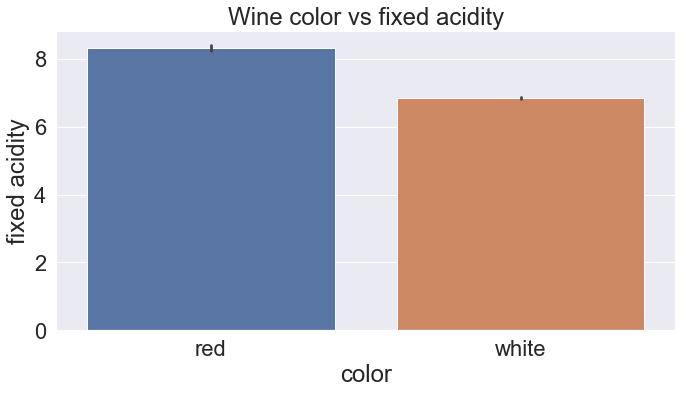

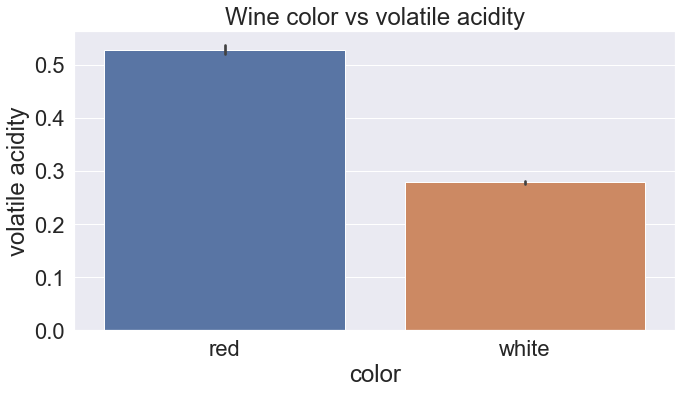

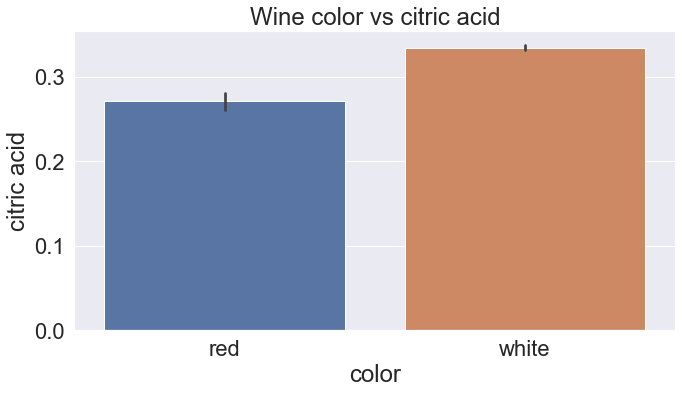

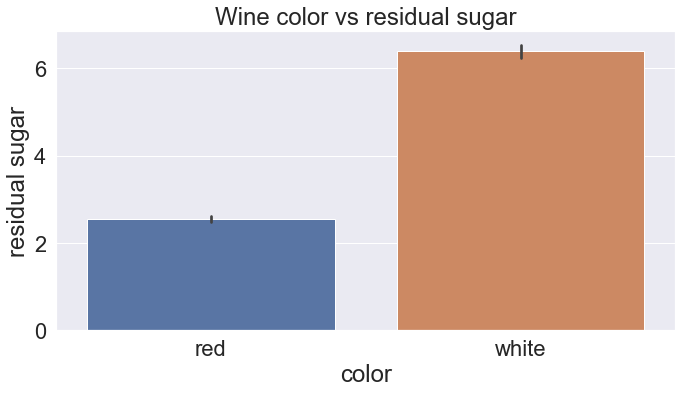

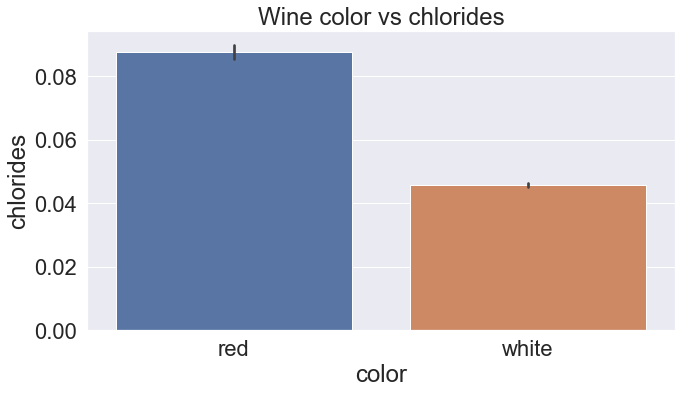

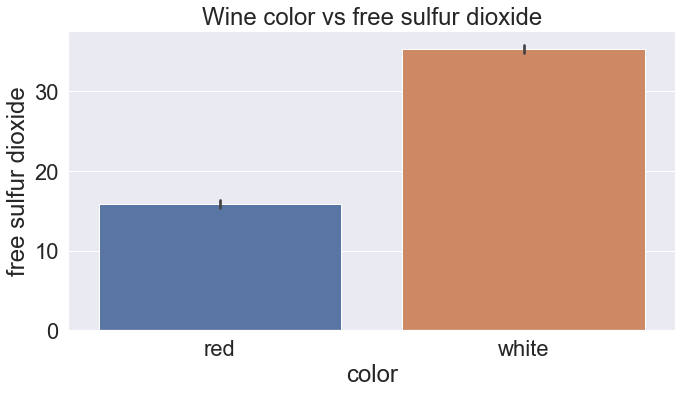

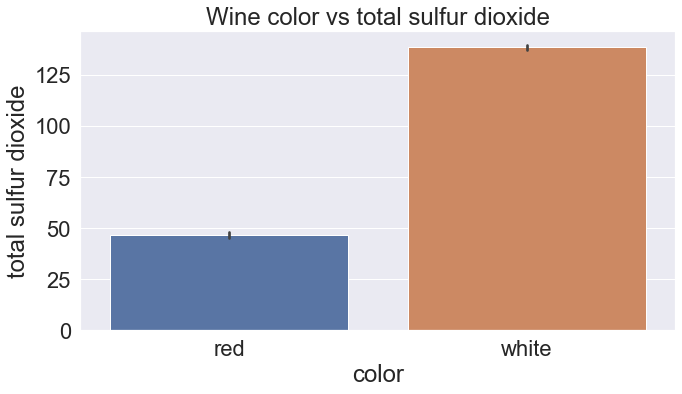

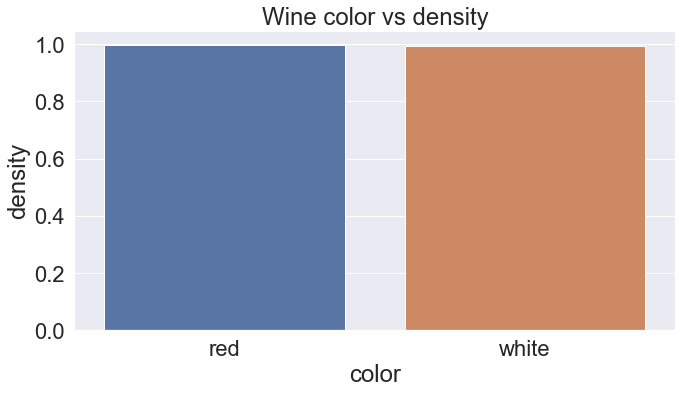

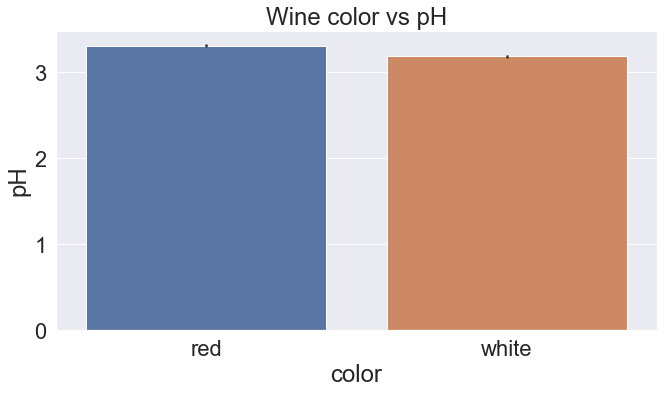

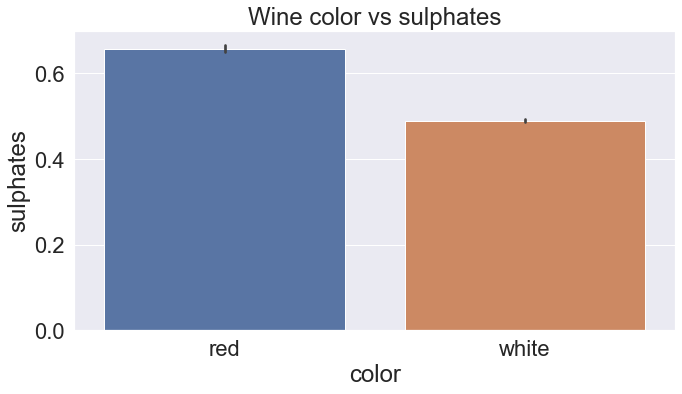

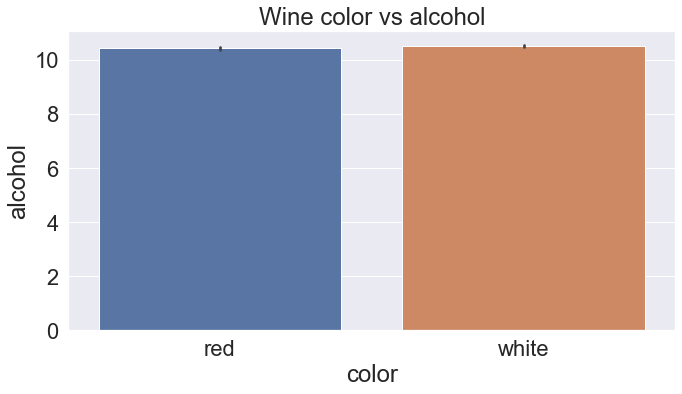

In [129]:
# plot each column vs quality of wine
for col in eda_color_col:
    plot_color_eda(col, data)

### Preprocessing Wine Color Data    <a class="anchor" id="Preprocessing_Color_Data"></a>

In [130]:
temp_data = data
temp_data['color'] = label_quality.fit_transform(temp_data['color'])
temp_data['color'].value_counts()

1    4898
0    1599
Name: color, dtype: int64

In [131]:
id(temp_data) == id(data)

True

In [132]:
#making a pi chart for the report
def plot_colorpiplot(data):
    acc_rate = round(data.color.mean(), 4)*100
    labels = 'White', 'Red'
    sizes = [acc_rate, 100-(acc_rate)]
    explode = (0, 0.1)
    colors = ['gold', 'maroon']
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1.1f%%', startangle=0, colors=colors)
    ax1.axis('equal')

    title = "Quantity of Each Wine Color"
    ax1.set_title(title)
    plt.savefig(p / (title+'.pdf') )
    plt.show()
    return

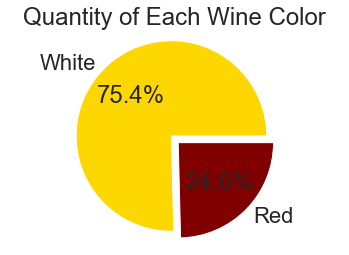

In [133]:
plot_colorpiplot(temp_data)

### Heat Map for Wine Color    <a class="anchor" id="Color_Heat_Map"></a>

In [134]:
hm_data = data.drop(['random'], axis=1)
hm_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
color                     int32
dtype: object

In [135]:
num_col = data.columns


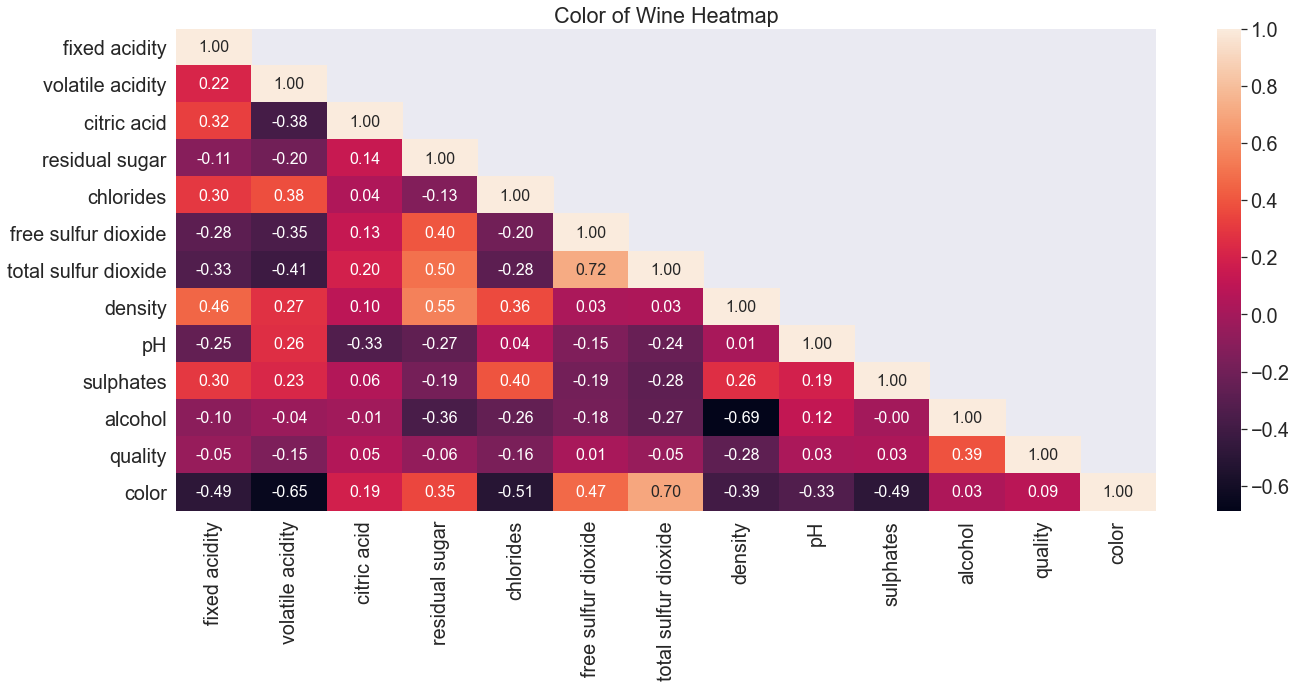

In [136]:
plot_heatmap(hm_data, "Color of")

### Splitting the Wine Color Data Set    <a class="anchor" id="Splitting_The_Color_Data"></a>

In [137]:
X = data.drop(['color'], axis=1)
y = data['color']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

In [139]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random
1539,7.2,0.390,0.32,1.80,0.065,34.0,60.0,0.99714,3.46,0.78,9.9,0,0.458368
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,0,0.955257
100,8.3,0.610,0.30,2.10,0.084,11.0,50.0,0.99720,3.40,0.61,10.2,0,0.196163
5477,6.5,0.350,0.31,10.20,0.069,58.0,170.0,0.99692,3.18,0.49,9.4,0,0.100559
6416,5.8,0.385,0.25,3.70,0.031,38.0,122.0,0.99128,3.20,0.63,11.2,0,0.175634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,0,0.749652
5191,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,1,0.484938
5226,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,0,0.364320
5390,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,0,0.896121


In [140]:
features_to_encode = X_train.columns[X_train.dtypes==object].tolist()  

In [141]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [142]:
X_train

array([[ 2.11284802e-03,  3.32462696e-01, -1.83218163e-03, ...,
        -4.94217715e-01, -4.99871713e-01, -1.41254532e-01],
       [ 2.79891768e+00,  8.27735349e-01,  7.59332762e-01, ...,
         2.59076212e-01, -4.99871713e-01,  1.57520358e+00],
       [ 8.56692104e-01,  1.69446249e+00, -1.40225808e-01, ...,
        -2.43119739e-01, -4.99871713e-01, -1.04701488e+00],
       ...,
       [-6.19399338e-01,  2.08644533e-01, -8.32193938e-01, ...,
        -8.29015016e-01, -4.99871713e-01, -4.66132663e-01],
       [-5.41710315e-01, -4.72355364e-01,  1.24371045e+00, ...,
        -8.29015016e-01, -4.99871713e-01,  1.37092381e+00],
       [ 2.11284802e-03,  1.75637157e+00, -1.80094932e+00, ...,
        -8.29015016e-01, -4.99871713e-01,  1.36194966e+00]])

### Feature Importance for Wine Color <a class="anchor" id="Color_Feature_Importance"></a>

In [143]:
rfc = RFC(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       434
           1       0.99      1.00      1.00      1191

    accuracy                           0.99      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [145]:
print(confusion_matrix(y_test, y_pred_rfc))

[[ 425    9]
 [   0 1191]]


In [146]:
accuracy_score(y_test, y_pred_rfc)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred_rfc),4)*100} %")

The accuracy of the model is 99.45 %


In [147]:
train_probs = rfc.predict_proba(X_train)[:,1] 
probs = rfc.predict_proba(X_test)[:, 1]
train_predictions = rfc.predict(X_train)

In [148]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9992068006206302


Recall
            Baseline: 1.0
            Test: 1.0
            Train: 1.0
Precision
            Baseline: 0.73
            Test: 0.99
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 1.0
            Train: 1.0


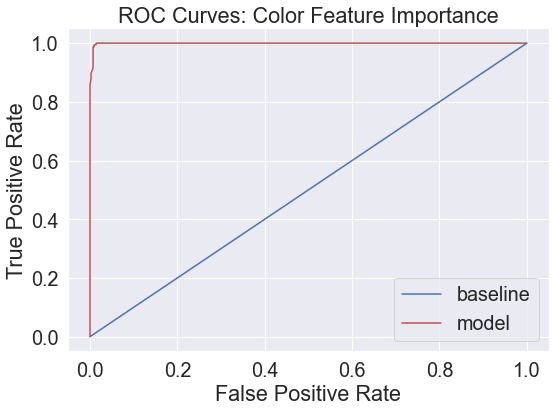

In [149]:
evaluate_model(y_pred_rfc, y_test, y_train, probs, train_predictions, train_probs, title_name="Color Feature Importance")

In [150]:
confusion_matrix(y_test, y_pred_rfc, normalize='all')

array([[0.26153846, 0.00553846],
       [0.        , 0.73292308]])

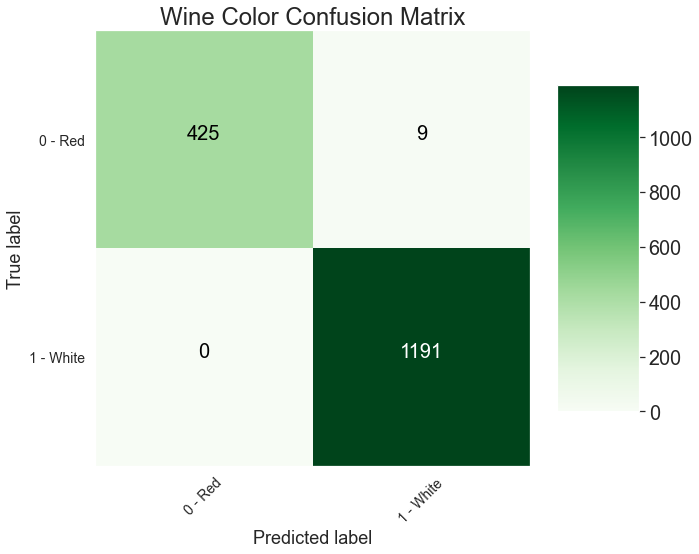

In [151]:
# Let's plot
cm = confusion_matrix(y_test, y_pred_rfc)
plot_confusion_matrix(cm, classes = ['0 - Red', '1 - White'],
                      title = 'Wine Color Confusion Matrix')

#### Random Forest Feature Importance for Wine Color <a class="anchor" id="Color_Feature_Importance_Results"></a>

In [152]:
print(rfc.feature_importances_)
print(f" There are {len(rfc.feature_importances_)} features in total")

[0.04897746 0.15797338 0.02355177 0.03927399 0.23088091 0.0477557
 0.30069249 0.06146854 0.02386768 0.05093691 0.00930871 0.00086081
 0.00445164]
 There are 13 features in total


In [153]:
rfc.feature_importances_

array([0.04897746, 0.15797338, 0.02355177, 0.03927399, 0.23088091,
       0.0477557 , 0.30069249, 0.06146854, 0.02386768, 0.05093691,
       0.00930871, 0.00086081, 0.00445164])

In [154]:
color_col_names = X.columns
feature_importances = list(zip(color_col_names, rfc.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
#[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];
feature_importances

[('fixed acidity', 0.04897746387400632),
 ('volatile acidity', 0.15797338481991402),
 ('citric acid', 0.023551766823977676),
 ('residual sugar', 0.039273989809480096),
 ('chlorides', 0.23088091109401665),
 ('free sulfur dioxide', 0.04775570056283514),
 ('total sulfur dioxide', 0.30069248506759977),
 ('density', 0.06146854254231137),
 ('pH', 0.023867679267292472),
 ('sulphates', 0.05093691429573687),
 ('alcohol', 0.009308708042180758),
 ('quality', 0.0008608128459420514),
 ('random', 0.0044516409547069044)]

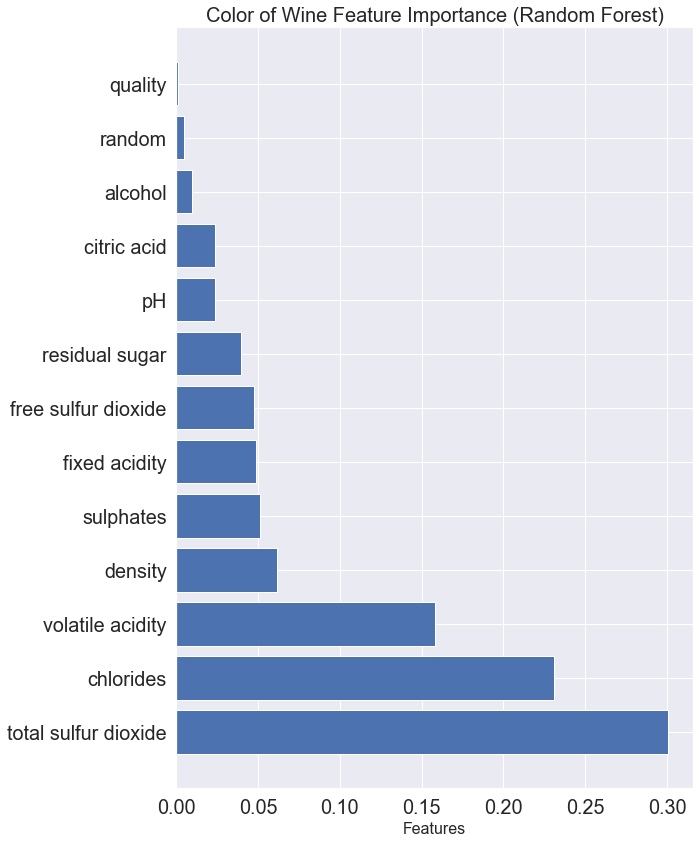

In [155]:
plot_feature_importance(feature_importances_ranked, "Color of")

## Model Selection for Wine Color <a class="anchor" id="Color_Model_Selection"></a>

From the results of the three quality classifier models, the optimized Random Forest classifiers gave the best ROC-AUC scores for red wine quality, 0.924, and white wine quality, 0.912, respectively. The other two models did not perform as well. Because of this, the wine color data set was modeled using only the Random Forest classifier. 

### random forest grid search  <a class="anchor" id="Color_RFC"></a>

In [156]:
rfc = RFC(oob_score=True)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [157]:
# Create random search model and fit the data
rf_grid = GridSearchCV(
                        estimator = rfc,
                        param_grid = random_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
rf_grid.fit(Xr_train, yr_train)
rf_grid.best_params_
rf_grid.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  7.6min finished


{'bootstrap': True,
 'max_depth': 55,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 275,
 'n_jobs': 4}

In [158]:
# Use the best model after tuning
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_best_rf_model = best_rf_model.predict(X_test)
pprint(best_rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 55,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 275,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Recall
            Baseline: 1.0
            Test: 1.0
            Train: 1.0
Precision
            Baseline: 0.73
            Test: 0.99
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 1.0
            Train: 1.0


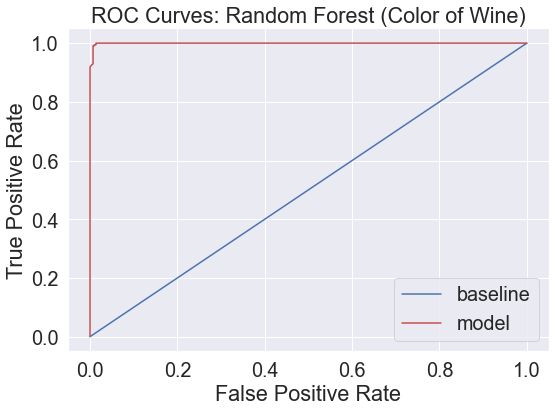

In [159]:
train_rf_predictions = best_rf_model.predict(X_train)
train_rf_probs = best_rf_model.predict_proba(X_train)[:, 1]
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores

evaluate_model(y_pred_best_rf_model, y_test, y_train, rf_probs, train_rf_predictions, train_rf_probs, title_name="Random Forest (Color of Wine)")

In [160]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_rf_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, rf_probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9994321853223292


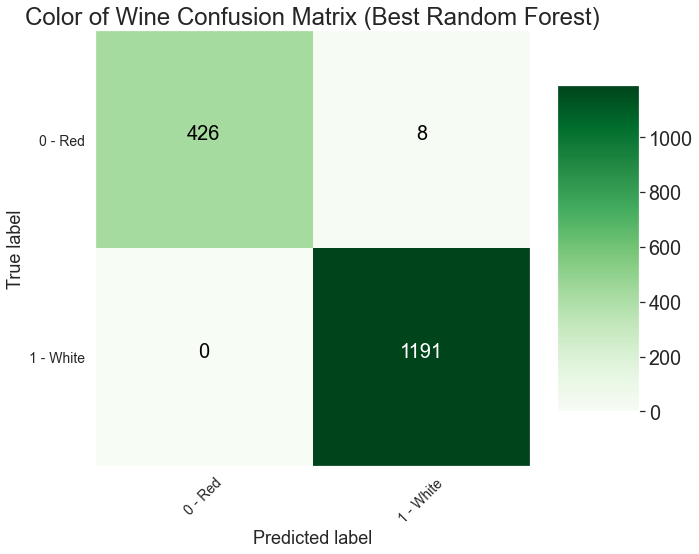

In [161]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_rf_model), classes = ['0 - Red', '1 - White'],
                      title = 'Color of Wine Confusion Matrix (Best Random Forest)')

## Conclusions for the Wine Color Subproject <a class="anchor" id="Color_Conclusions"></a>

The ROC-AUC score for the classifier was very high. The model predicted a perfect 1.0 on the trial data and then predicted a 0.999 on the test data set. While this is suspicious, this is exactly the outcome desired: to produce a classifier that predicts the color of wine based on the characteristics. The features to choose what makes a good red or white wine were not necessarily the same as the features that were important to classify if a wine was red or white. More likely was the differences between red and white wines were easily identified by the classifier model. 

To increase the efficiency for this model, minimizing the features to the important features listed in the analysis while removing extraneous features should be attempted. Using the top four most important features like total sulfur dioxide, chlorides, volatile acidity, and density should be able to predict a similar outcome.

The specific wine types for the wines were removed from the data set, specifically which types of white or red wines and which grape cultivars were used in the wine making process. Adding the subtlety of which wine types were present could have more fine tuning to what makes a good quality of each wine style rather than a general good red or white wine. Adding more types of wines of both red and white but also those intermediary wines like rosé wines would be an interesting study. 

Generally, these analyses were performed on wines that were from a particular region in Portugal. It would be interesting to apply these results to wines of other regions of similar and different geological, geographic, and climate conditions to see whether the physicochemical properties would still produce the same profile for predicting good quality. 